In [28]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'train_data.csv')
data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2019-08-27 12:00:00,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.6,0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,2018-06-06 12:00:00,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.5,0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,2014-10-11 12:00:00,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.0,2,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,2015-09-11 12:00:00,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.0,4,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,2016-06-22 12:00:00,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.0,1,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183935,2012-09-19 12:00:00,22.5,15.4,63.0,35.2,180,1016.90,10.1,0.0,2,...,11.5,27.6,11.5,16.9,16.3,3.8,Canada,45.230000,-63.06000,23.5
1183936,2011-08-01 12:00:00,17.4,12.1,70.0,22.2,300,1018.30,49.7,0.0,10,...,20.6,334.2,35.6,6.1,12.8,2.5,Canada,49.350000,-124.16000,14.5
1183937,2017-07-09 12:00:00,21.0,15.0,68.7,13.0,200,1014.50,14.5,0.0,1,...,5.2,107.5,9.3,2.1,1.8,0.1,Canada,43.628613,-79.39500,76.8
1183938,2010-04-24 12:00:00,16.2,-1.4,31.0,25.9,220,1016.50,48.3,0.0,3,...,12.1,21.5,12.0,15.3,15.4,3.4,Canada,45.466667,-73.75000,36.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183940 entries, 0 to 1183939
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   report_date              1183940 non-null  object 
 1   temperature              1183940 non-null  float64
 2   dew_point_temperature    1183940 non-null  float64
 3   relative_humidity        1183940 non-null  float64
 4   wind_speed               1183940 non-null  float64
 5   wind_direction           1183940 non-null  int64  
 6   atmospheric_pressure     1183940 non-null  float64
 7   visibility               1183940 non-null  float64
 8   precipitation            1183940 non-null  float64
 9   rain_days                1183940 non-null  int64  
 10  snow_on_ground           1183940 non-null  float64
 11  fine_fuel_moisture_code  1183940 non-null  float64
 12  duff_moisture_code       1183940 non-null  float64
 13  drought_code             1183940 non-null 

In [4]:
data.drop(['report_date'], axis =1 , inplace = True)

In [5]:
import numpy as np

def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [6]:
numerical_features = [
    'temperature', 'dew_point_temperature', 'relative_humidity',
    'wind_speed', 'atmospheric_pressure', 'visibility',
    'precipitation', 'rain_days', 'snow_on_ground',
    'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
    'build_up_index', 'initial_spread_index', 'fire_weather_index'
]

train_data_cleaned = remove_outliers(data, numerical_features)
train_data_cleaned

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.60,0,0.0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.685000,252.0
1,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.50,0,0.0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.400000,745.0
3,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.00,4,0.0,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.450000,619.0
8,13.3,9.4,77.4,9.3,200,1008.90,16.1,0.25,0,0.0,...,9.7,10.9,9.4,2.7,2.6,0.2,United States,32.411330,-99.681890,545.8
13,20.5,18.7,89.0,9.4,170,1016.69,9.8,1.02,0,0.0,...,6.3,30.5,8.3,0.9,0.5,0.0,United States,30.691418,-88.242836,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183930,19.0,-4.0,20.0,7.4,271,1008.40,16.1,0.00,1,0.0,...,29.2,331.1,47.8,8.2,18.8,4.9,United States,40.896610,-117.805885,1313.0
1183932,22.2,8.1,40.0,10.1,119,1013.00,25.9,0.00,3,0.0,...,21.9,206.2,34.7,6.3,13.1,2.6,Canada,52.074165,-111.449450,791.0
1183933,7.6,1.5,65.0,13.0,150,1028.58,33.7,0.30,0,0.0,...,16.5,250.6,28.3,1.3,2.4,0.1,Canada,57.040000,-111.560000,310.0
1183937,21.0,15.0,68.7,13.0,200,1014.50,14.5,0.00,1,0.0,...,5.2,107.5,9.3,2.1,1.8,0.1,Canada,43.628613,-79.395000,76.8


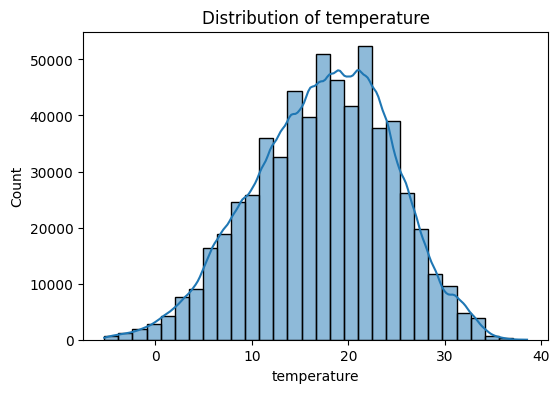

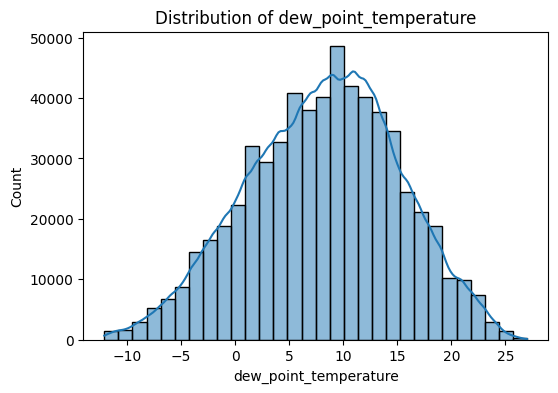

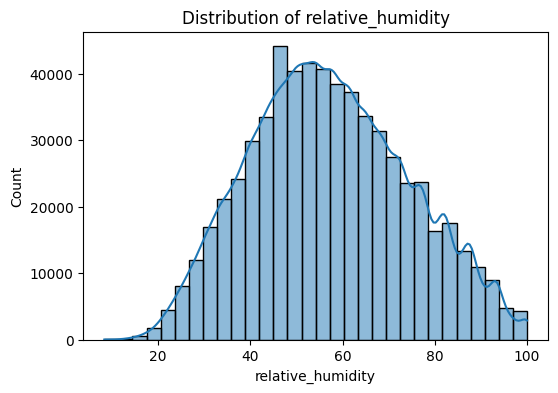

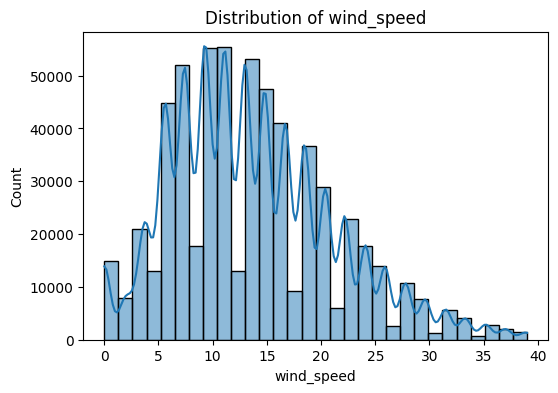

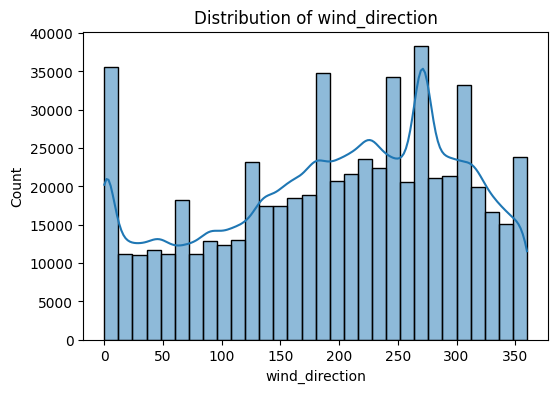

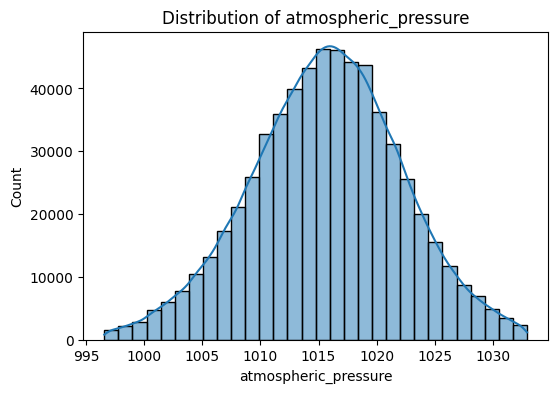

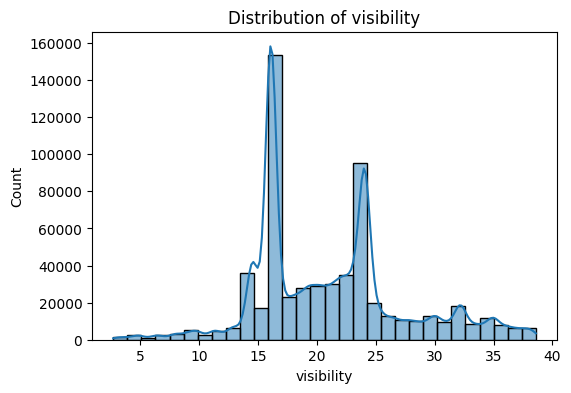

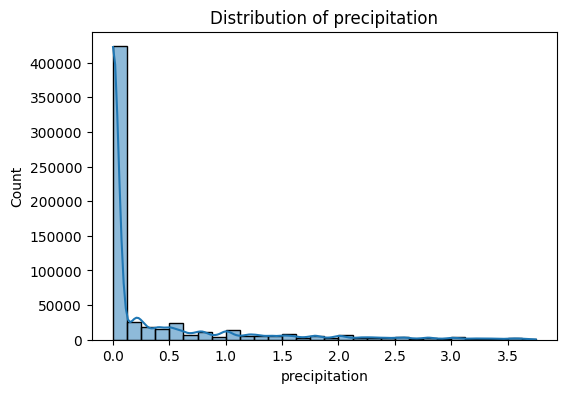

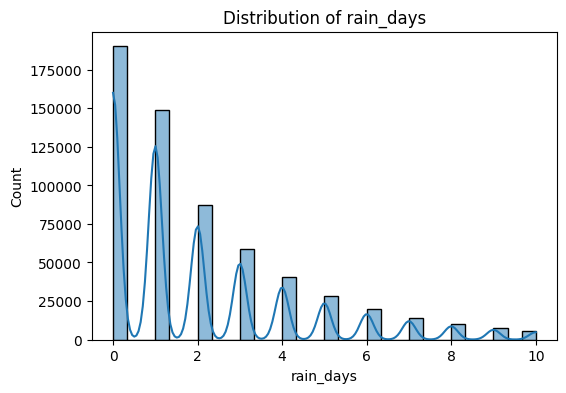

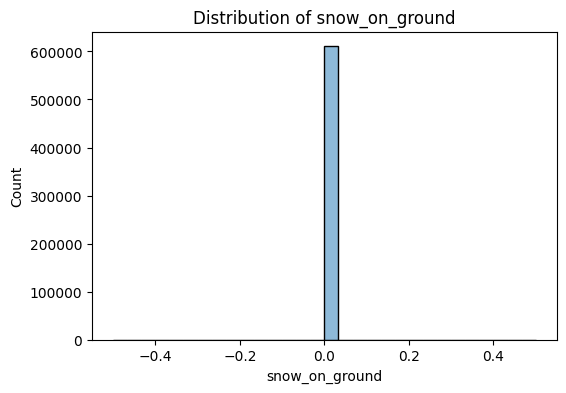

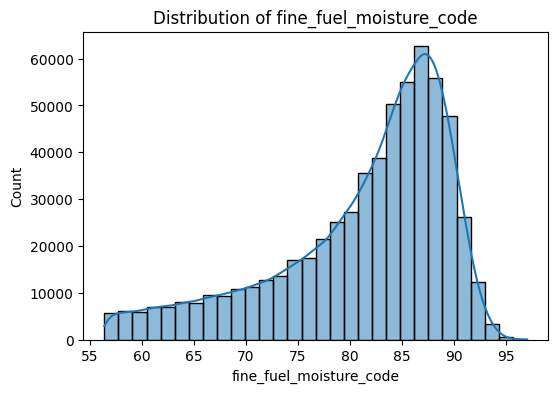

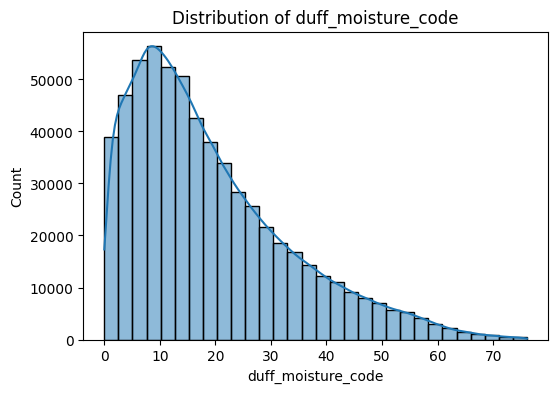

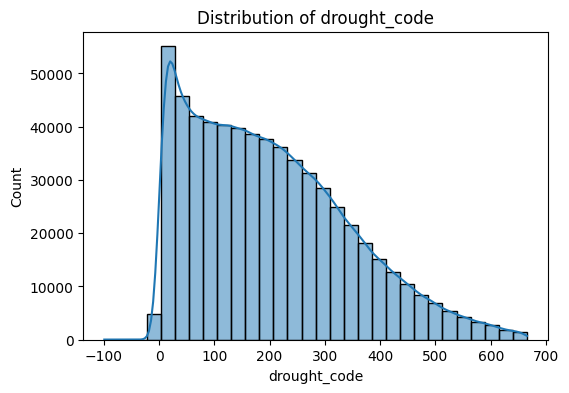

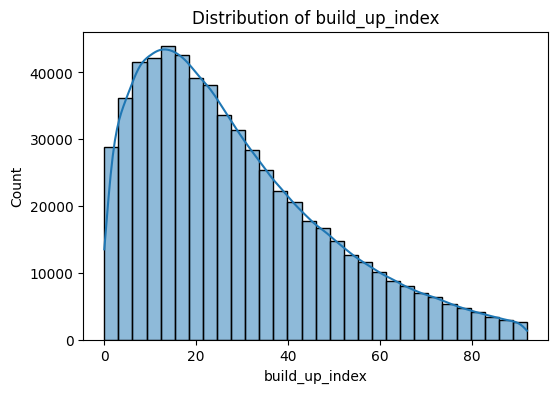

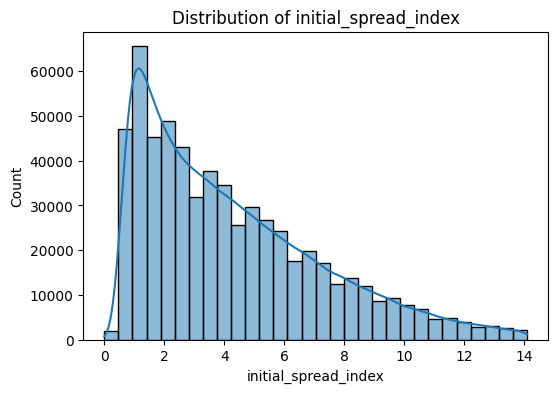

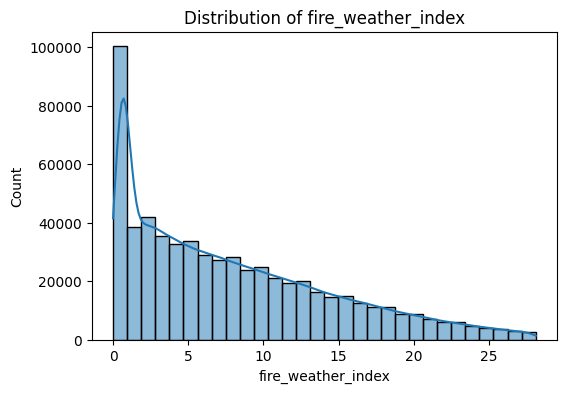

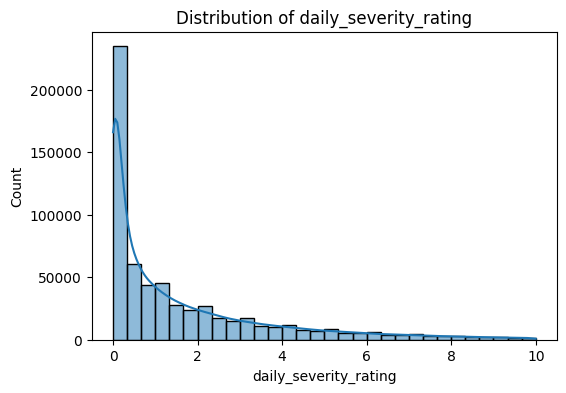

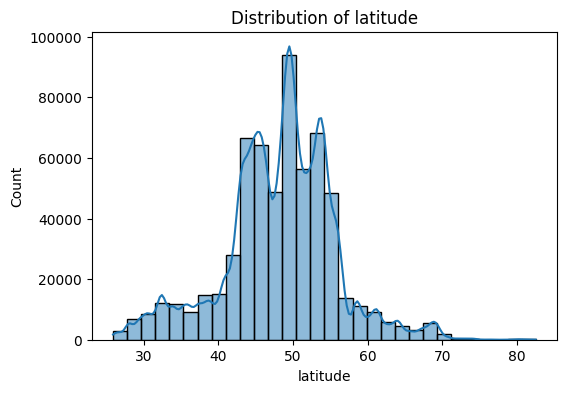

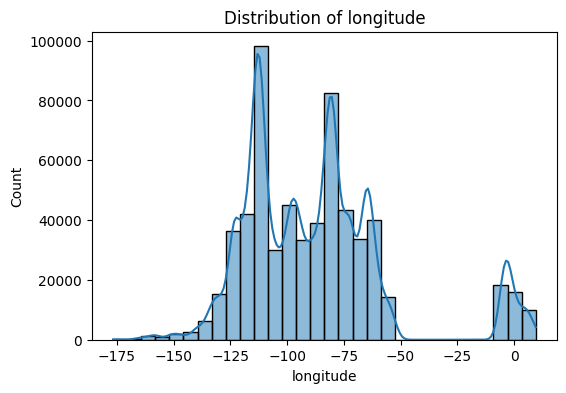

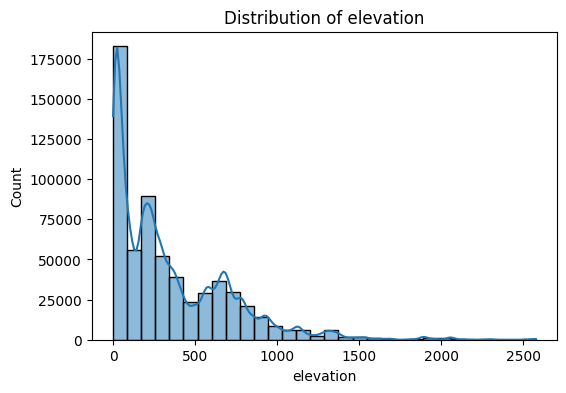

In [7]:
for col in train_data_cleaned.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(train_data_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

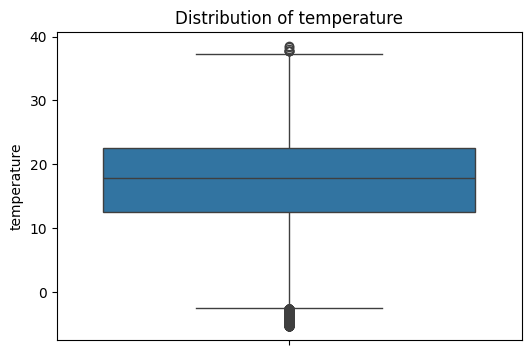

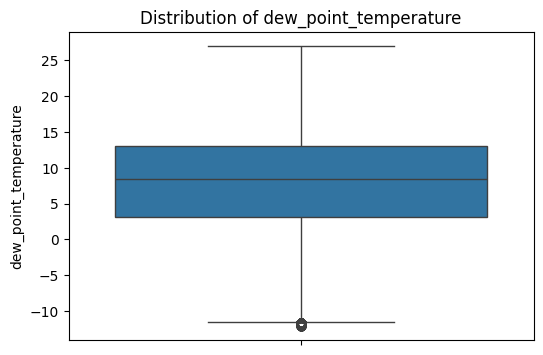

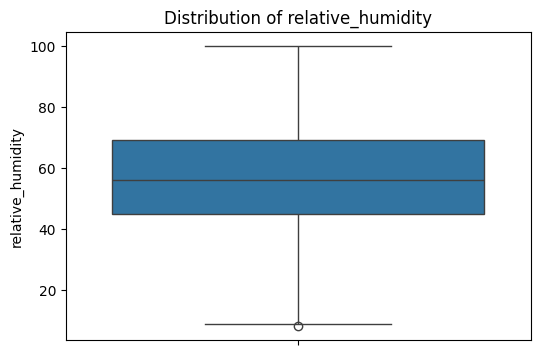

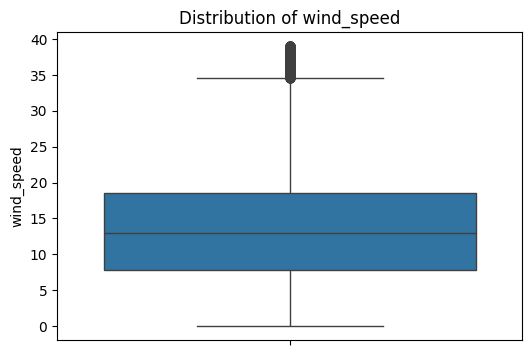

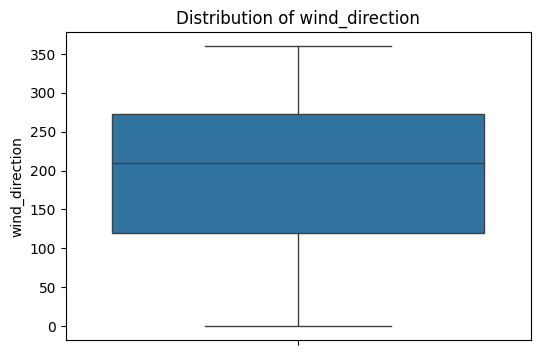

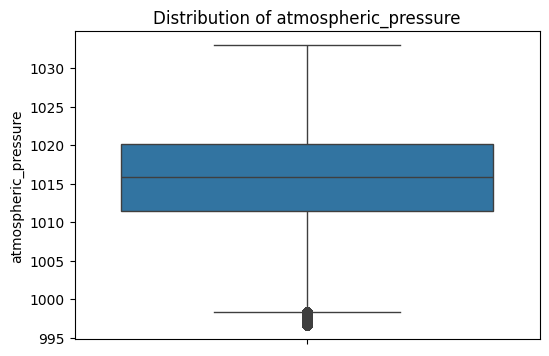

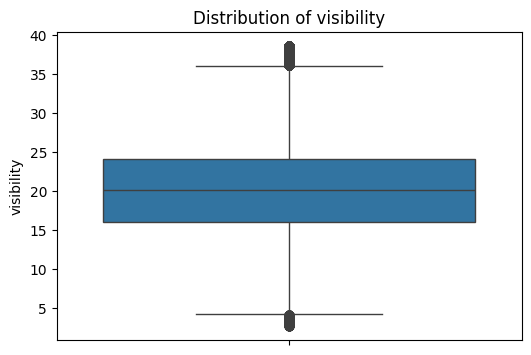

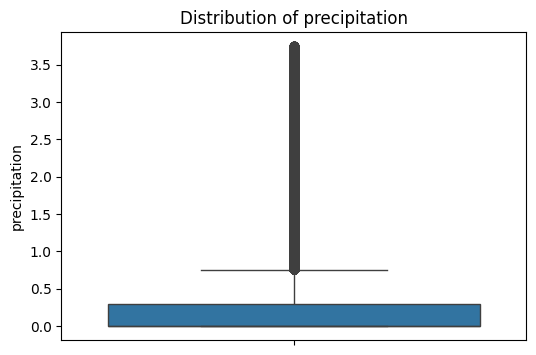

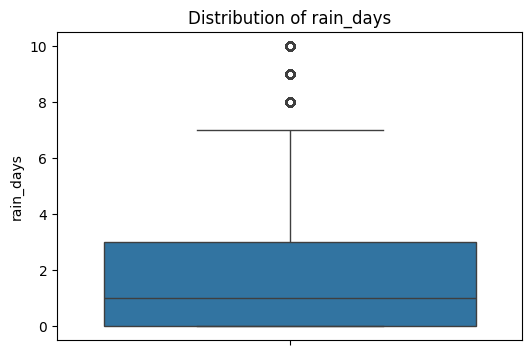

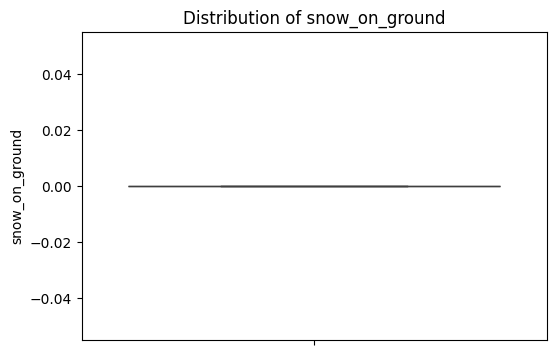

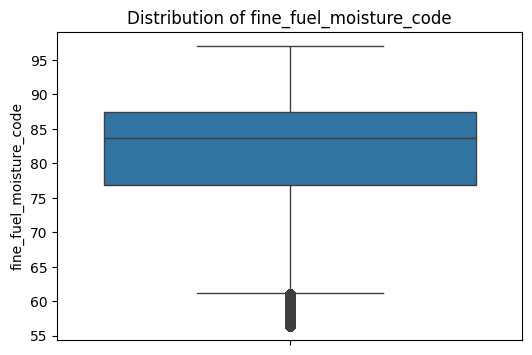

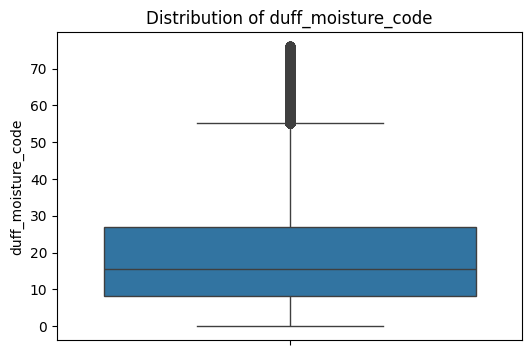

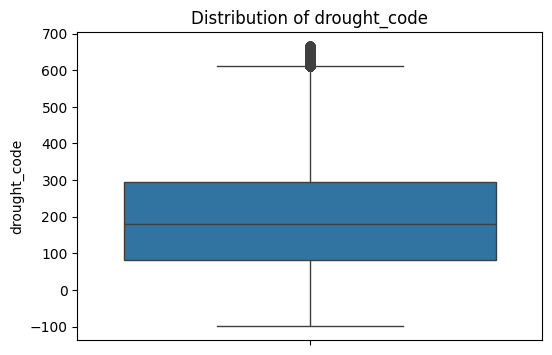

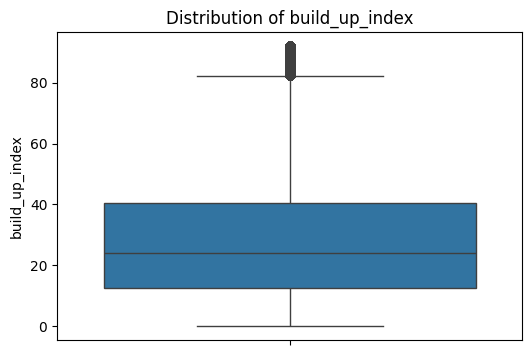

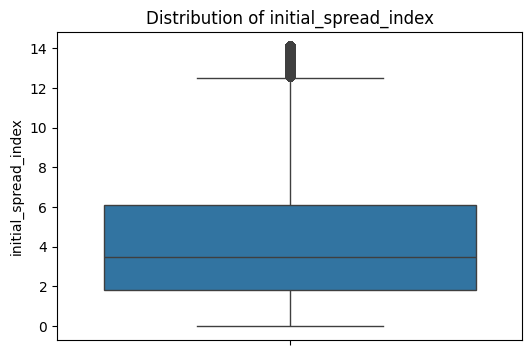

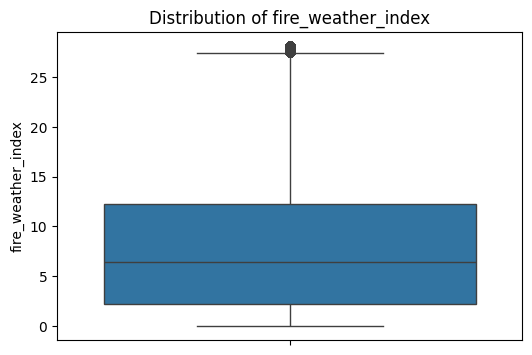

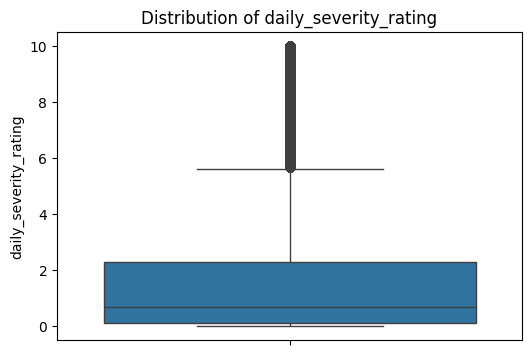

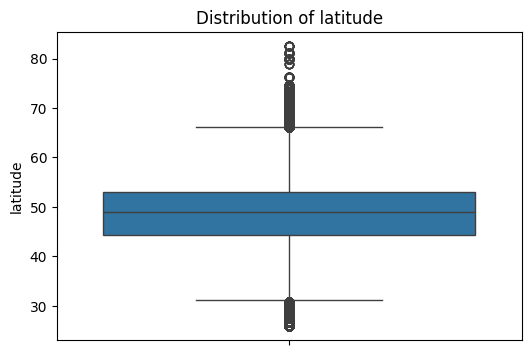

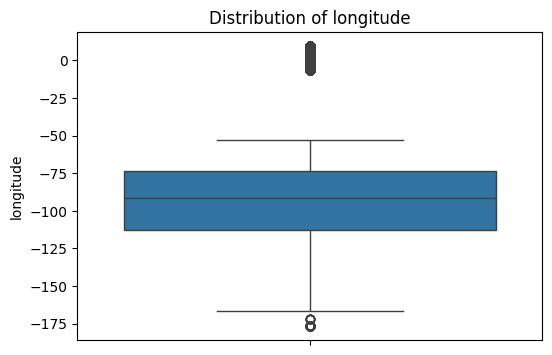

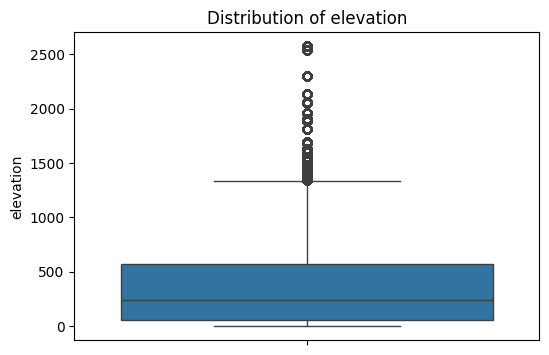

In [8]:
for col in train_data_cleaned.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = train_data_cleaned[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [9]:
data['drought_code'] = np.where(data['drought_code'] < 0, 0, data['drought_code'])

In [10]:
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.6,0,0.0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.5,0,0.0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.0,2,0.0,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.0,4,0.0,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.0,1,0.0,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183935,22.5,15.4,63.0,35.2,180,1016.90,10.1,0.0,2,0.0,...,11.5,27.6,11.5,16.9,16.3,3.8,Canada,45.230000,-63.06000,23.5
1183936,17.4,12.1,70.0,22.2,300,1018.30,49.7,0.0,10,0.0,...,20.6,334.2,35.6,6.1,12.8,2.5,Canada,49.350000,-124.16000,14.5
1183937,21.0,15.0,68.7,13.0,200,1014.50,14.5,0.0,1,0.0,...,5.2,107.5,9.3,2.1,1.8,0.1,Canada,43.628613,-79.39500,76.8
1183938,16.2,-1.4,31.0,25.9,220,1016.50,48.3,0.0,3,0.0,...,12.1,21.5,12.0,15.3,15.4,3.4,Canada,45.466667,-73.75000,36.0


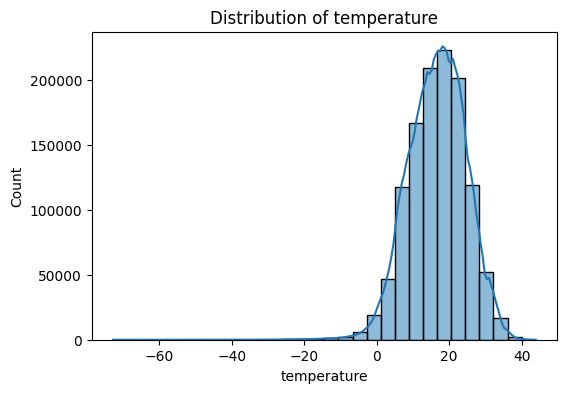

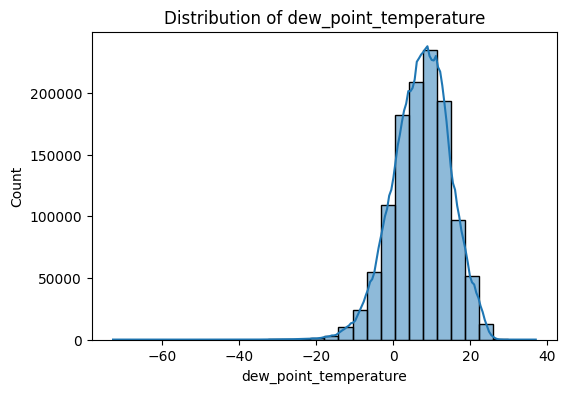

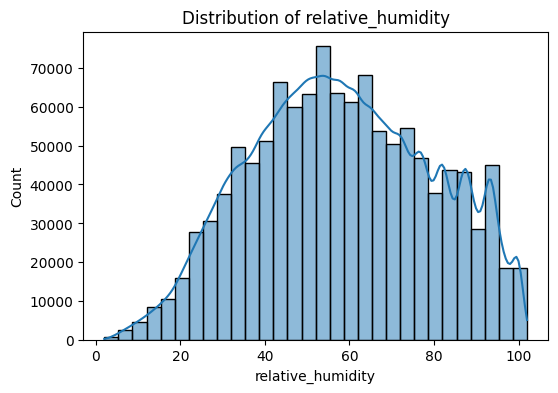

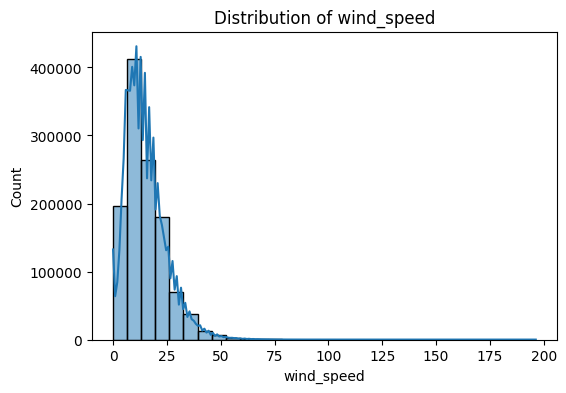

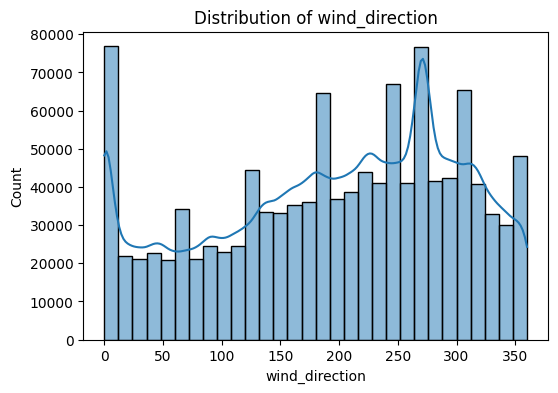

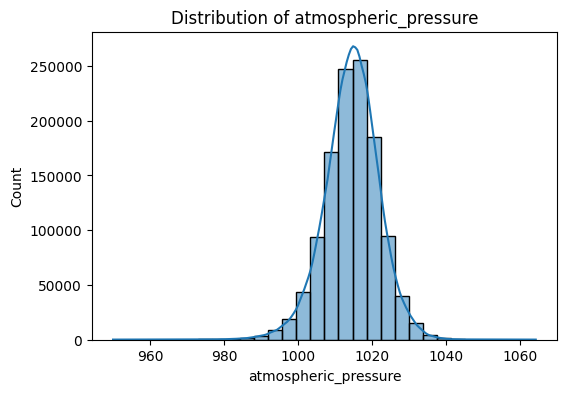

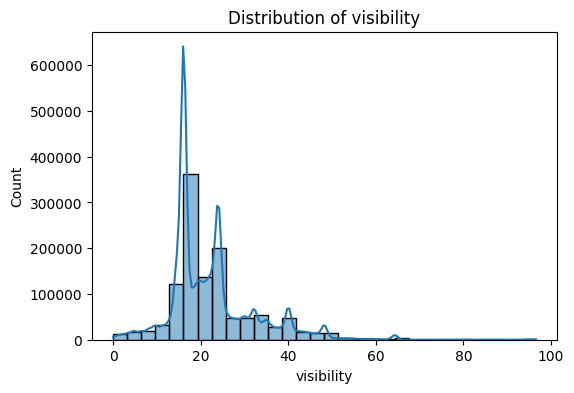

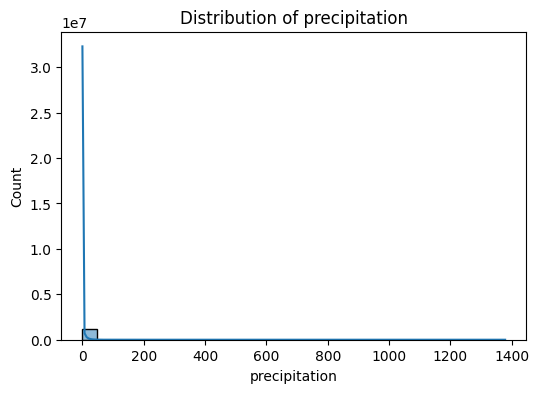

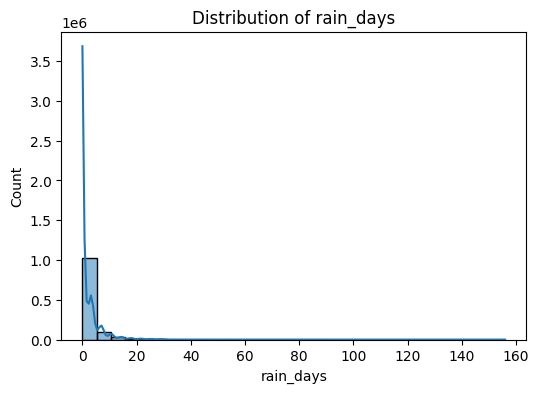

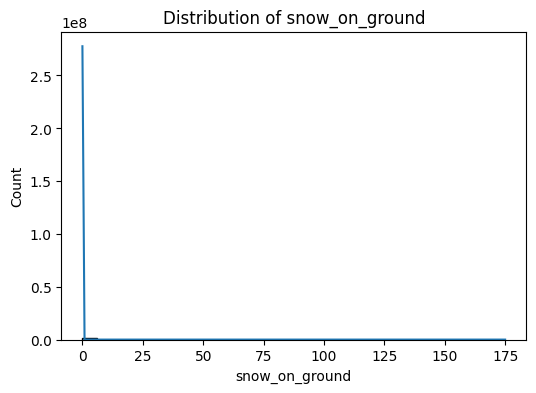

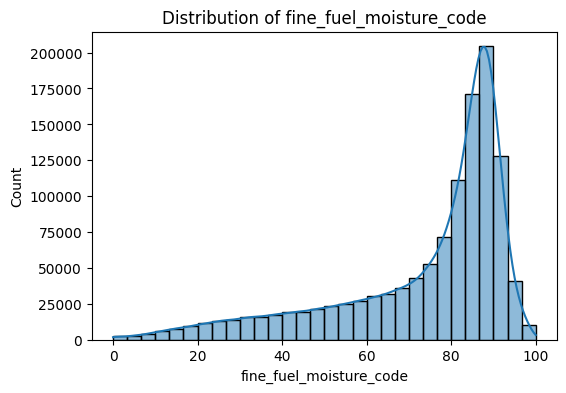

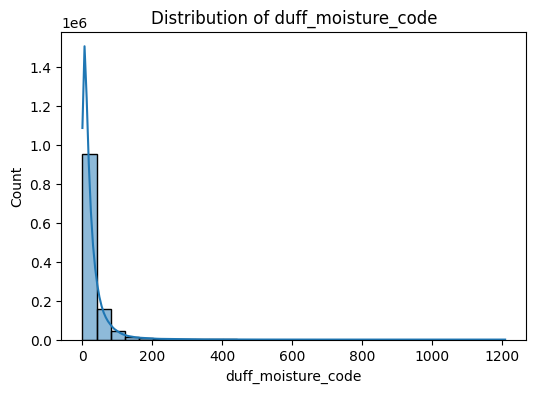

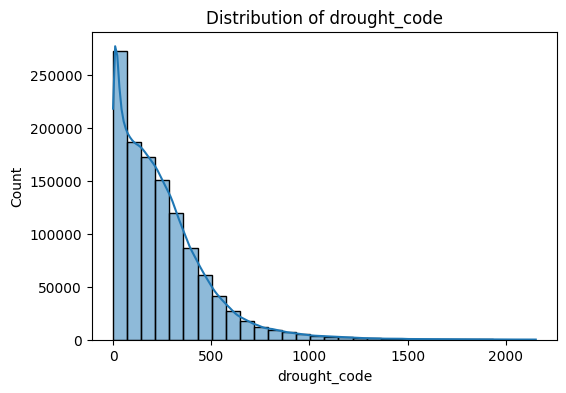

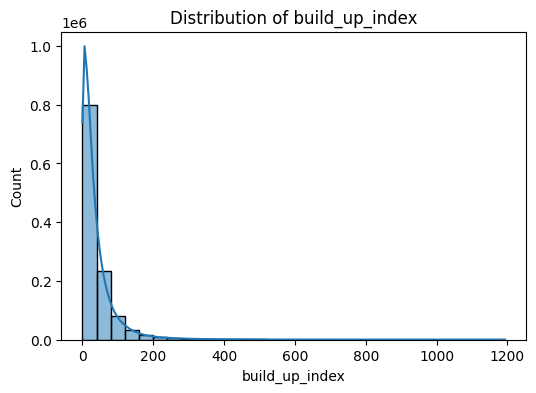

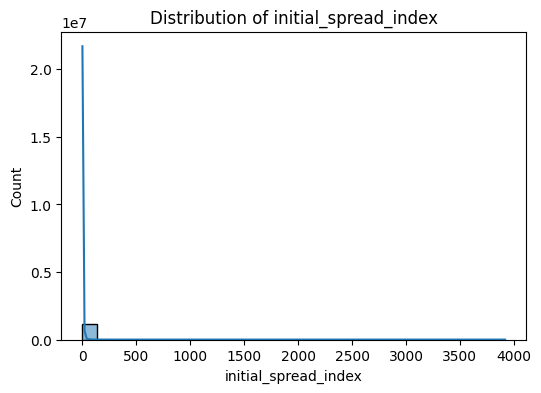

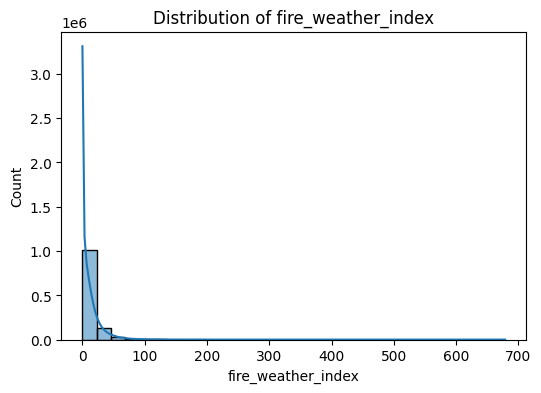

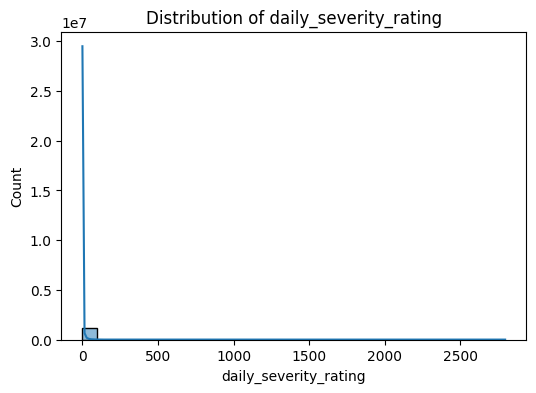

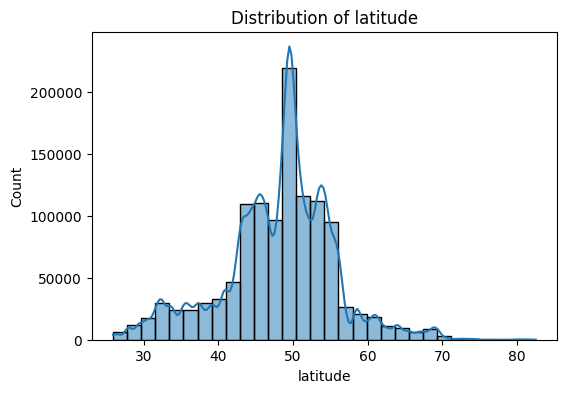

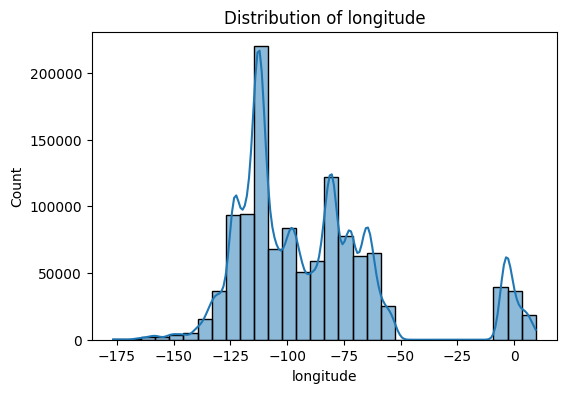

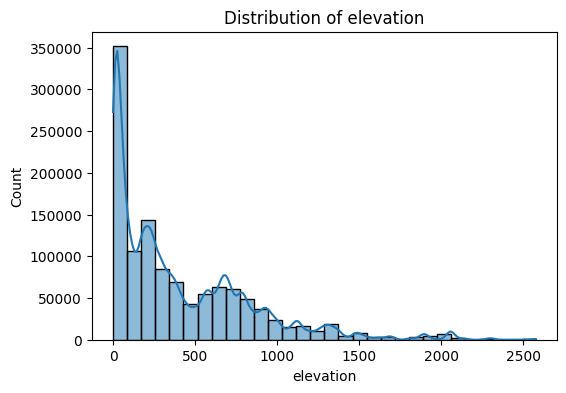

In [11]:
for col in data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

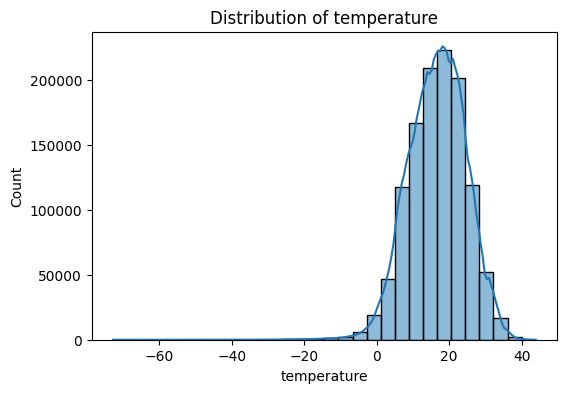

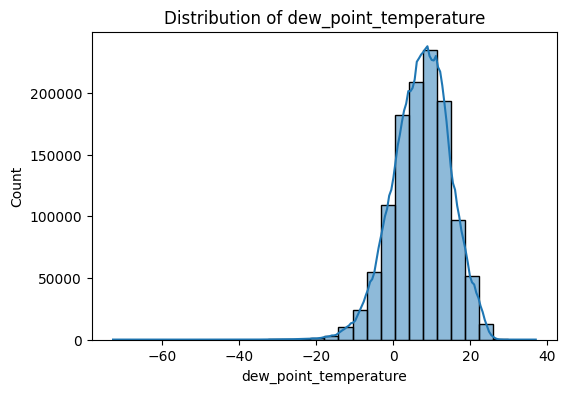

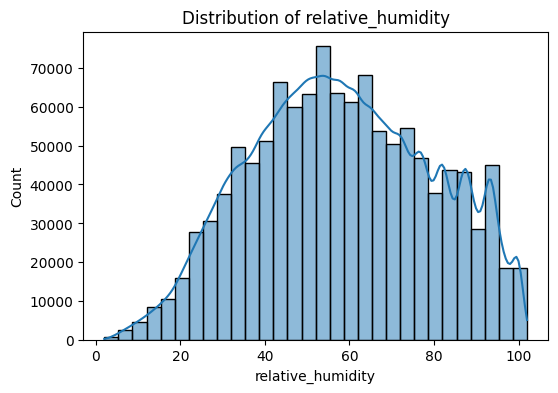

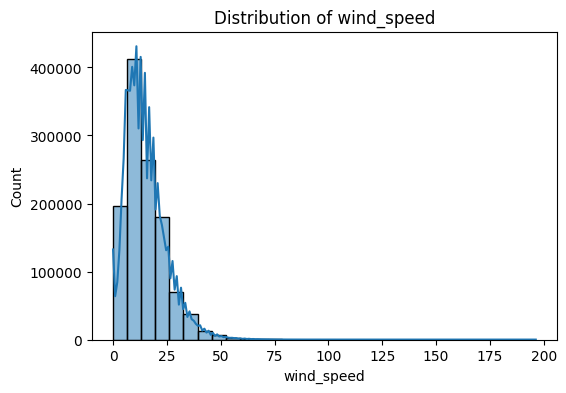

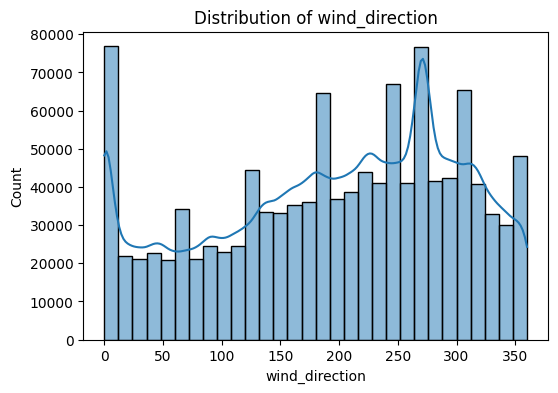

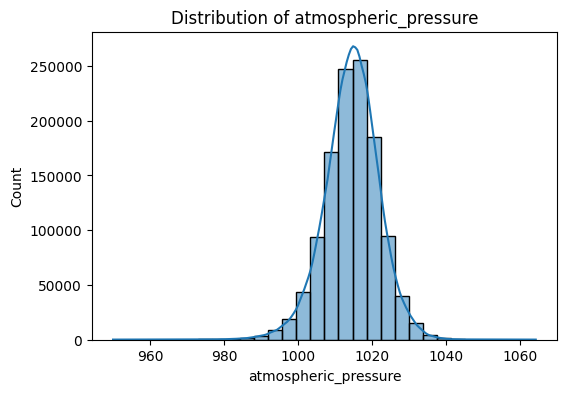

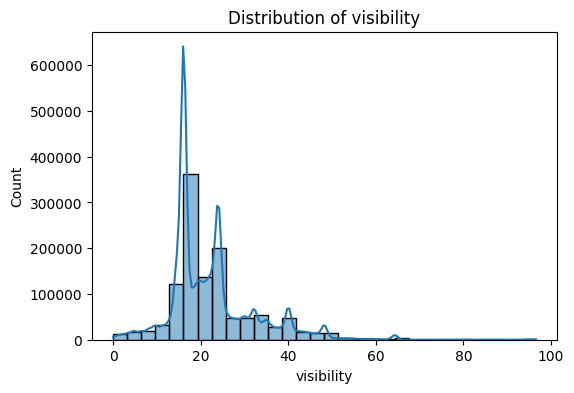

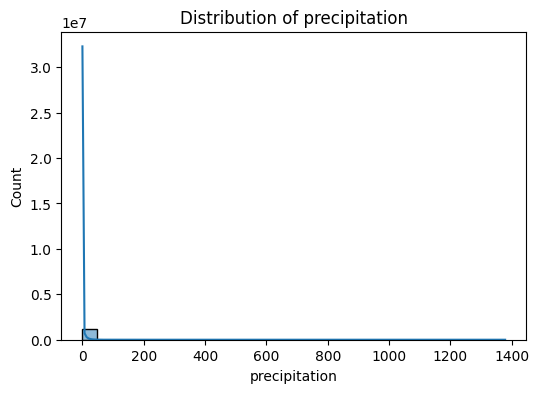

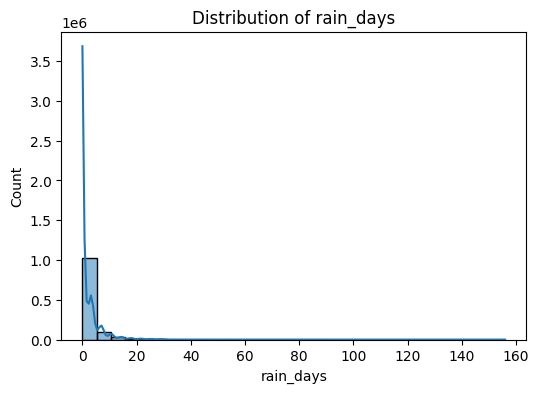

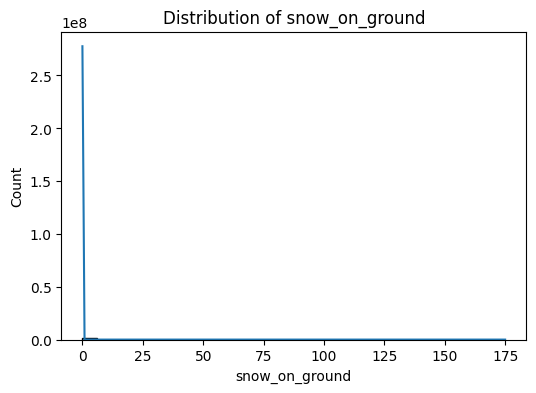

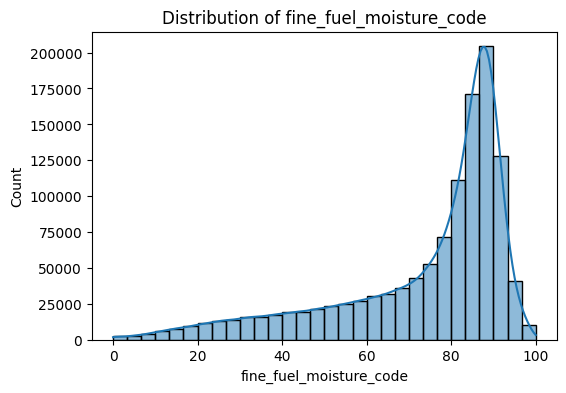

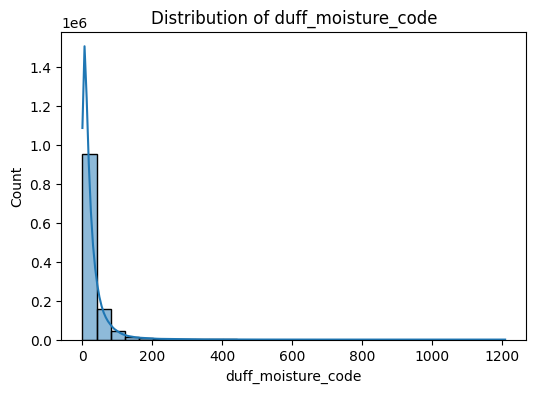

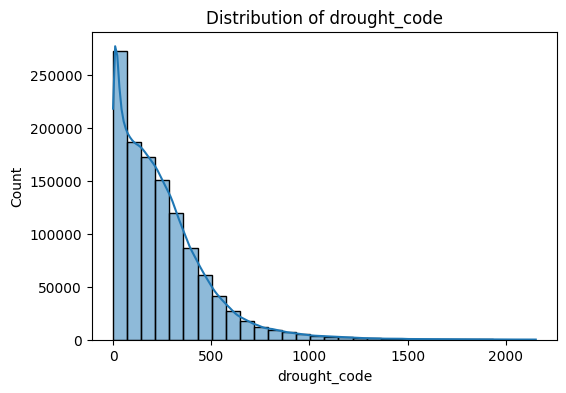

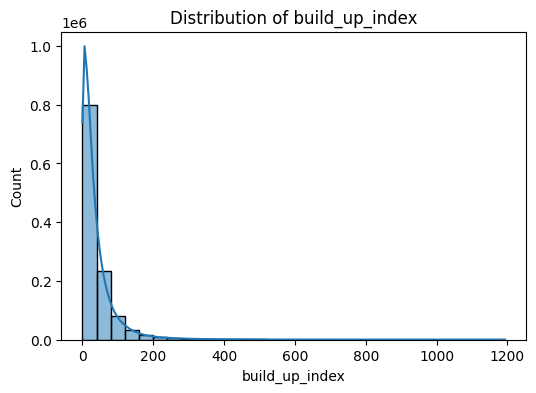

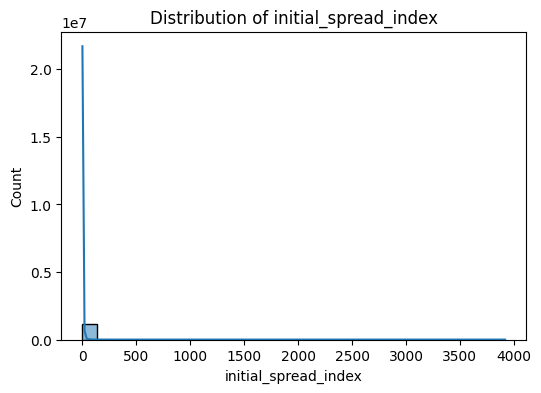

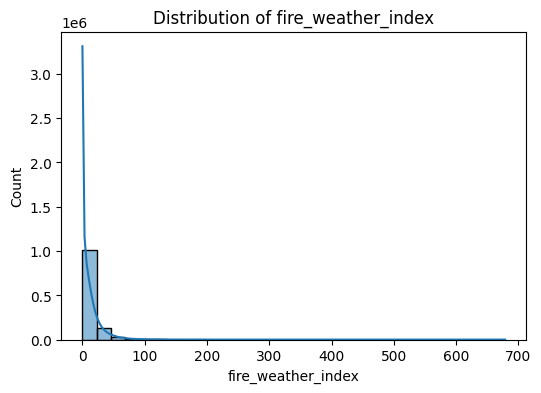

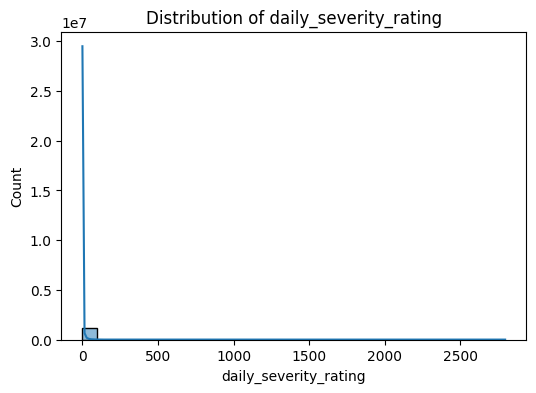

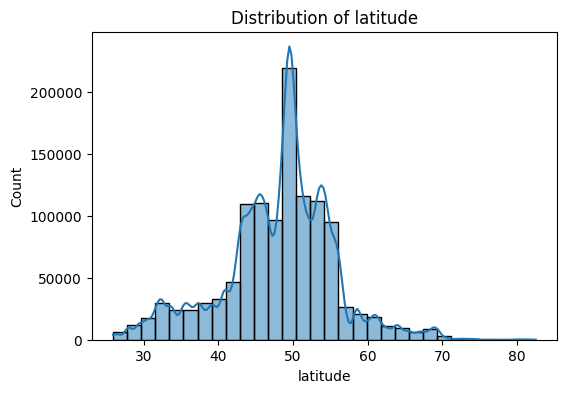

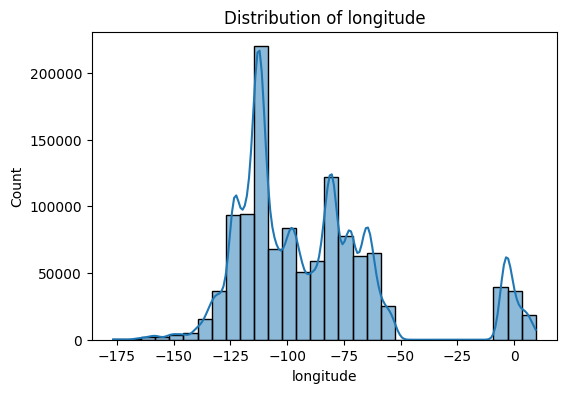

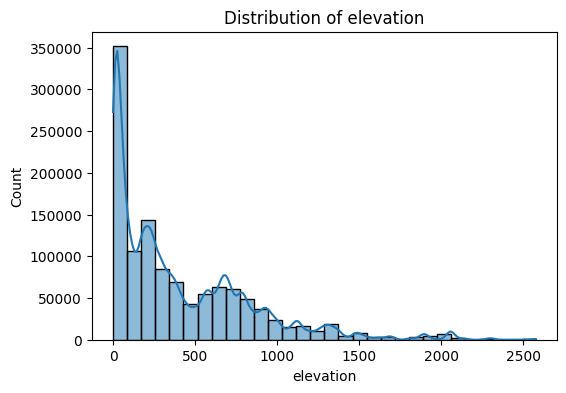

In [12]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    # Save the figure as PNG
    plt.savefig(f'distribution_{col}.png', bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    # Close the figure to release memory
    plt.close()

Optimal Box-Cox lambda: 0.45792764446476386


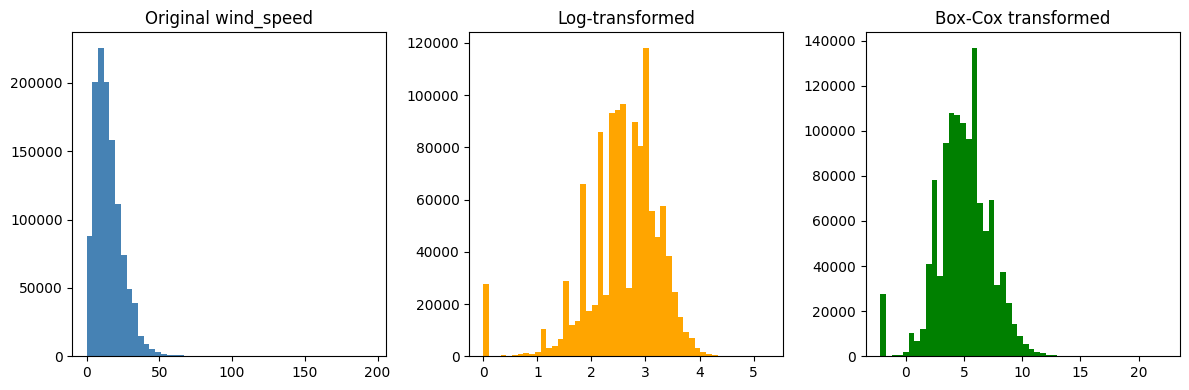

In [13]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

wind_speed_log = np.log1p(data['wind_speed'])

# --- Box-Cox Transformation ---
wind_speed_positive = data['wind_speed'].copy()
if (data['wind_speed'] <= 0).any():
    wind_speed_positive += 1e-6

wind_speed_boxcox, fitted_lambda = boxcox(wind_speed_positive)

print(f"Optimal Box-Cox lambda: {fitted_lambda}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data['wind_speed'], bins=50, color='steelblue')
plt.title('Original wind_speed')

plt.subplot(1, 3, 2)
plt.hist(wind_speed_log, bins=50, color='orange')
plt.title('Log-transformed')

plt.subplot(1, 3, 3)
plt.hist(wind_speed_boxcox, bins=50, color='green')
plt.title('Box-Cox transformed')

plt.tight_layout()
plt.savefig('distribution_wind_speed.png', bbox_inches='tight')
plt.show()

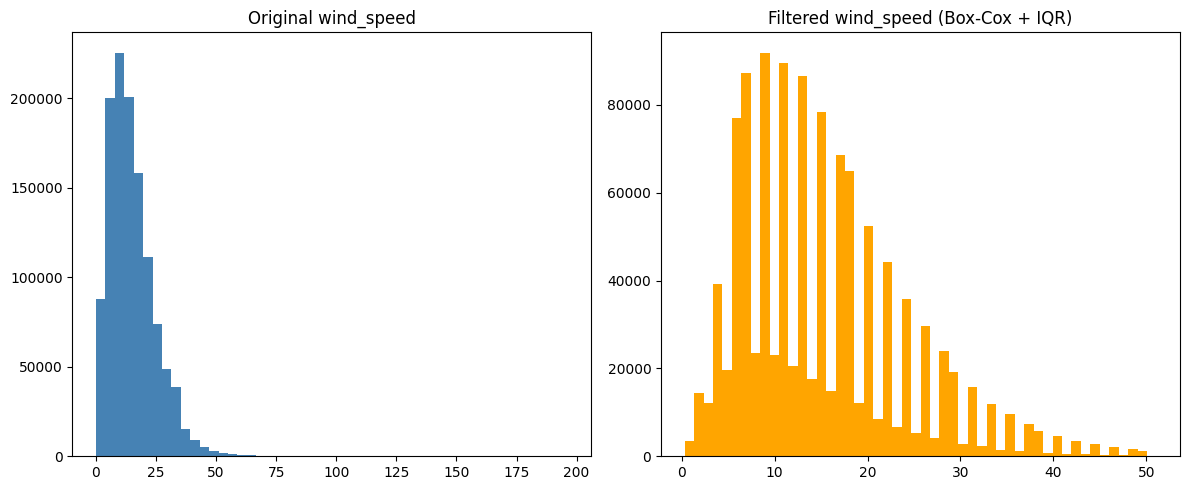

In [14]:
# Prepare data for Box-Cox
wind_speed_positive = data['wind_speed'].copy()
if (wind_speed_positive <= 0).any():
    wind_speed_positive += 1e-6

# Box-Cox transform
wind_speed_boxcox, lambda_bc = boxcox(wind_speed_positive)

# Calculate IQR fences in Box-Cox space
Q1 = np.percentile(wind_speed_boxcox, 25)
Q3 = np.percentile(wind_speed_boxcox, 75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Mask for non-outliers
mask = (wind_speed_boxcox >= lower_fence) & (wind_speed_boxcox <= upper_fence)

# Filter data
data_filtered = data.loc[mask].copy()

# Plot before and after filtering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['wind_speed'], bins=50, color='steelblue')
plt.title('Original wind_speed')

plt.subplot(1, 2, 2)
plt.hist(data_filtered['wind_speed'], bins=50, color='orange')
plt.title('Filtered wind_speed (Box-Cox + IQR)')

plt.tight_layout()
plt.show()

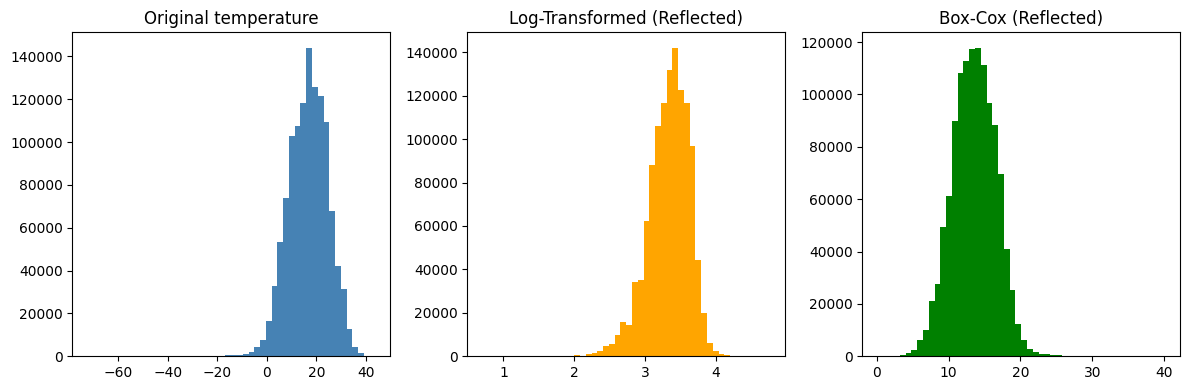

In [15]:
# Assume data['temperature'] contains your temperature values
temp = data['temperature']

# Step 1: Reflect
c = temp.max() + 1
temp_reflected = c - temp

# Step 2: Apply Box-Cox (shift if zeros)
if (temp_reflected <= 0).any():
    temp_reflected += 1e-6
temp_boxcox, fitted_lambda = boxcox(temp_reflected)

# Step 3 (Optional): For log transform
temp_log = np.log1p(temp_reflected)

# Plot to check the result
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(temp, bins=50, color='steelblue')
plt.title('Original temperature')
plt.subplot(1, 3, 2)
plt.hist(temp_log, bins=50, color='orange')
plt.title('Log-Transformed (Reflected)')
plt.subplot(1, 3, 3)
plt.hist(temp_boxcox, bins=50, color='green')
plt.title('Box-Cox (Reflected)')
plt.tight_layout()
plt.show()

Optimal Box-Cox lambda: 0.1455596922711209


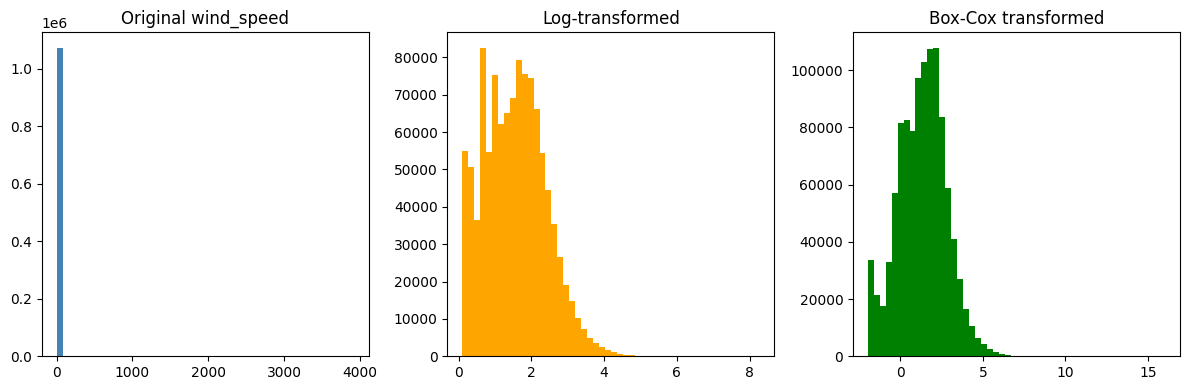

In [16]:
nonzero =  data['initial_spread_index'][data['initial_spread_index'] > 0]
log_transformed = np.log1p(nonzero)
boxcox_transformed, fitted_lambda = boxcox(nonzero)

print(f"Optimal Box-Cox lambda: {fitted_lambda}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(nonzero, bins=50, color='steelblue')
plt.title('Original wind_speed')

plt.subplot(1, 3, 2)
plt.hist(log_transformed, bins=50, color='orange')
plt.title('Log-transformed')

plt.subplot(1, 3, 3)
plt.hist(boxcox_transformed, bins=50, color='green')
plt.title('Box-Cox transformed')

plt.tight_layout()
#plt.savefig('distribution_wind_speed.png', bbox_inches='tight')
plt.show()

In [17]:
def remove_outliers_boxcox(series):
    s = series.copy()
    if (s <= 0).any():
        s = s + 1e-6
    s_boxcox, _ = boxcox(s)
    Q1 = np.percentile(s_boxcox, 25)
    Q3 = np.percentile(s_boxcox, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (s_boxcox >= lower) & (s_boxcox <= upper)
    print(f"{series.name}: Box-Cox outlier removal retained {mask.sum()} of {len(series)} values")
    return mask

In [18]:
def remove_outliers_no_transform(series):
    s = series.copy()
    Q1 = np.percentile(s, 25)
    Q3 = np.percentile(s, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (s >= lower) & (s <= upper)
    print(f"{series.name}: No-transform outlier removal retained {mask.sum()} of {len(series)} values")
    return mask

In [19]:
def remove_outliers_zero_inflated(series):
    # Mask array initialized as False for all values
    mask = pd.Series(False, index=series.index)
    
    # Zero mask (keep zeros as is)
    zeros_mask = (series == 0)
    
    # Non-zero values
    nonzero = series[~zeros_mask]
    
    if len(nonzero) > 0:
        # Apply Box-Cox IQR outlier removal on non-zero values
        nonzero_mask = remove_outliers_boxcox(nonzero)
        
        # Update mask for non-zero entries with outlier filtering
        mask.loc[nonzero.index] = nonzero_mask
        
    # Combine zeros with filtered non-zeros
    combined_mask = zeros_mask | mask
    
    print(f"{series.name}: Zero-inflated outlier removal retained {combined_mask.sum()} of {len(series)} values (includes zeros)")
    return combined_mask

In [20]:
boxcox_cols = ['wind_speed',
               'fine_fuel_moisture_code', 
               'drought_code',
               'duff_moisture_code',
               'build_up_index',
               'fire_weather_index'
              ]

no_transform_cols = ['relative_humidity', 
                     'temperature',
                     'dew_point_temperature',
                     'atmospheric_pressure',
                    ]

zero_based_cols = ['precipitation',
                   #'rain_days',
                   'initial_spread_index',
                   'snow_on_ground',
                   'fire_weather_index',
                  ]

In [21]:
# Initialize combined mask as all True to start
combined_mask = pd.Series(True, index=data.index)

# Apply outlier removal on boxcox columns
for col in boxcox_cols:
    mask_col = remove_outliers_boxcox(data[col])
    #print(f"{col} mask type: {type(mask_col)}, mask index equals data index? {mask_col.index.equals(data.index)}")
    combined_mask = combined_mask & mask_col

# Apply on no-transform columns
for col in no_transform_cols:
    mask_col = remove_outliers_no_transform(data[col])
    #print(f"{col} mask type: {type(mask_col)}, mask index equals data index? {mask_col.index.equals(data.index)}")
    combined_mask = combined_mask & mask_col

# Apply zero-inflation aware outlier removal on zero-based columns
for col in zero_based_cols:
    mask_col = remove_outliers_zero_inflated(data[col])
    combined_mask = combined_mask & mask_col

# Filter dataset after all outlier removals
filtered_data = data.loc[combined_mask].copy()

print(f"Rows before filtering: {len(data)}")
print(f"Rows after filtering outliers across all columns: {len(filtered_data)}")

wind_speed: Box-Cox outlier removal retained 1150587 of 1183940 values
fine_fuel_moisture_code: Box-Cox outlier removal retained 1183940 of 1183940 values
drought_code: Box-Cox outlier removal retained 1179978 of 1183940 values
duff_moisture_code: Box-Cox outlier removal retained 1151344 of 1183940 values
build_up_index: Box-Cox outlier removal retained 1155829 of 1183940 values
fire_weather_index: Box-Cox outlier removal retained 1183836 of 1183940 values
relative_humidity: No-transform outlier removal retained 1183940 of 1183940 values
temperature: No-transform outlier removal retained 1177618 of 1183940 values
dew_point_temperature: No-transform outlier removal retained 1174879 of 1183940 values
atmospheric_pressure: No-transform outlier removal retained 1160148 of 1183940 values
precipitation: Box-Cox outlier removal retained 551307 of 551578 values
precipitation: Zero-inflated outlier removal retained 1183669 of 1183940 values (includes zeros)
initial_spread_index: Box-Cox outlier

In [22]:
filtered_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,12.0,7.6,74.4,12.0,0,1015.13,30.0,2.6,0,0.0,...,6.9,51.1,10.3,0.9,0.6,0.0,United Kingdom,54.502224,-2.68500,252.0
1,11.1,1.7,52.0,22.1,200,1010.80,38.6,1.5,0,0.0,...,14.8,104.2,21.9,1.7,2.7,0.2,Canada,55.200000,-119.40000,745.0
2,2.9,2.3,95.0,1.9,250,1018.19,27.7,0.0,2,0.0,...,3.1,330.1,6.1,0.1,0.0,0.0,Canada,49.820000,-74.98000,381.1
3,22.1,11.1,49.8,9.5,267,1015.79,23.9,0.0,4,0.0,...,11.4,282.9,20.7,3.8,6.3,0.7,Canada,54.280000,-111.45000,619.0
4,17.0,10.0,63.6,35.2,260,1016.70,16.1,0.0,1,0.0,...,107.4,482.9,138.1,15.6,47.7,25.4,United States,37.618805,-122.37542,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183935,22.5,15.4,63.0,35.2,180,1016.90,10.1,0.0,2,0.0,...,11.5,27.6,11.5,16.9,16.3,3.8,Canada,45.230000,-63.06000,23.5
1183936,17.4,12.1,70.0,22.2,300,1018.30,49.7,0.0,10,0.0,...,20.6,334.2,35.6,6.1,12.8,2.5,Canada,49.350000,-124.16000,14.5
1183937,21.0,15.0,68.7,13.0,200,1014.50,14.5,0.0,1,0.0,...,5.2,107.5,9.3,2.1,1.8,0.1,Canada,43.628613,-79.39500,76.8
1183938,16.2,-1.4,31.0,25.9,220,1016.50,48.3,0.0,3,0.0,...,12.1,21.5,12.0,15.3,15.4,3.4,Canada,45.466667,-73.75000,36.0


In [23]:
filtered_data_NN = filtered_data
filtered_data_NN.to_csv(r'filtered_data_NN.csv')

In [24]:
from sklearn.preprocessing import PowerTransformer

# Ensure positive values for Box-Cox, shift if necessary
for col in boxcox_cols:
    min_val = filtered_data[col].min()
    if min_val <= 0:
        shift = abs(min_val) + 1e-6
        filtered_data[col] = filtered_data[col] + shift

# Fit and transform boxcox columns
pt = PowerTransformer(method='box-cox', standardize=False)
filtered_data[boxcox_cols] = pt.fit_transform(filtered_data[boxcox_cols])

# Now 'data' contains all original columns but with boxcox_cols replaced by transformed values
print(filtered_data.head())

   temperature  dew_point_temperature  relative_humidity  wind_speed  \
0         12.0                    7.6               74.4    3.925709   
1         11.1                    1.7               52.0    5.522161   
2          2.9                    2.3               95.0    0.718170   
3         22.1                   11.1               49.8    3.398300   
4         17.0                   10.0               63.6    6.985122   

   wind_direction  atmospheric_pressure  visibility  precipitation  rain_days  \
0               0               1015.13        30.0            2.6          0   
1             200               1010.80        38.6            1.5          0   
2             250               1018.19        27.7            0.0          2   
3             267               1015.79        23.9            0.0          4   
4             260               1016.70        16.1            0.0          1   

   snow_on_ground  ...  duff_moisture_code  drought_code  build_up_index  \
0   

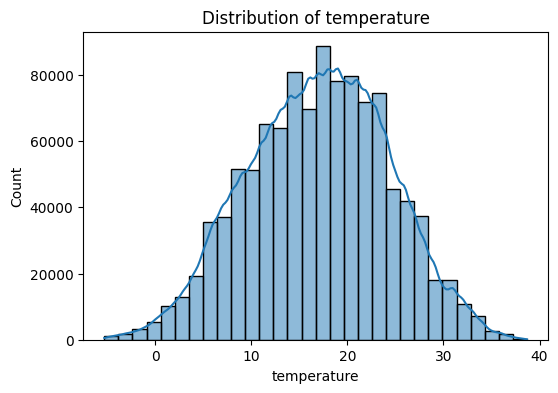

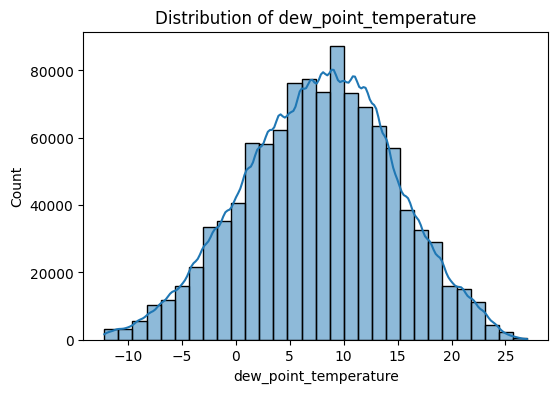

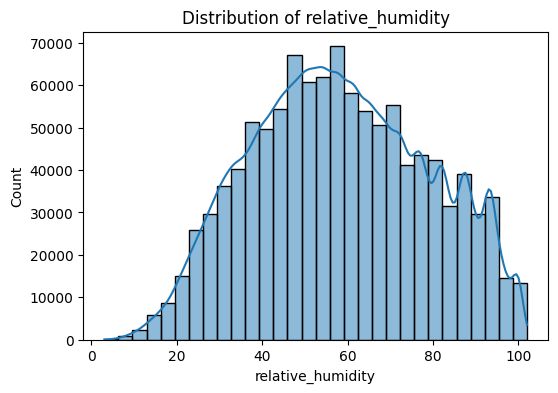

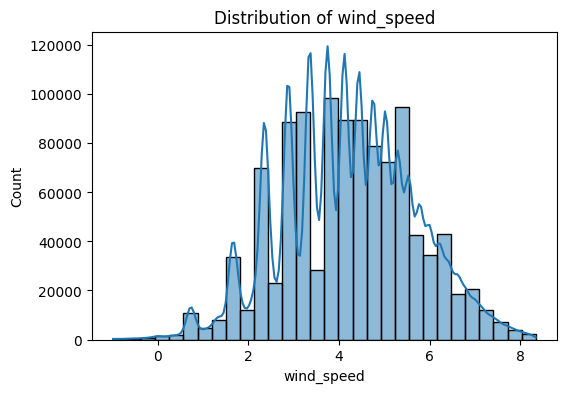

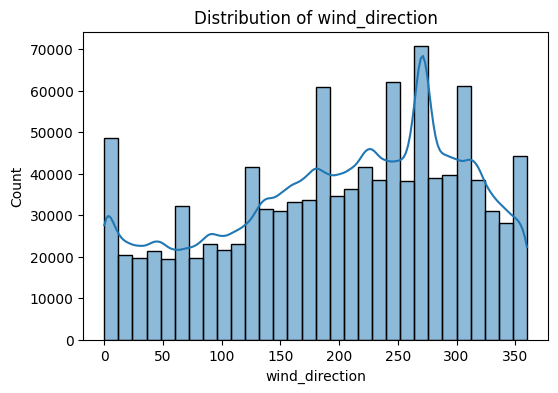

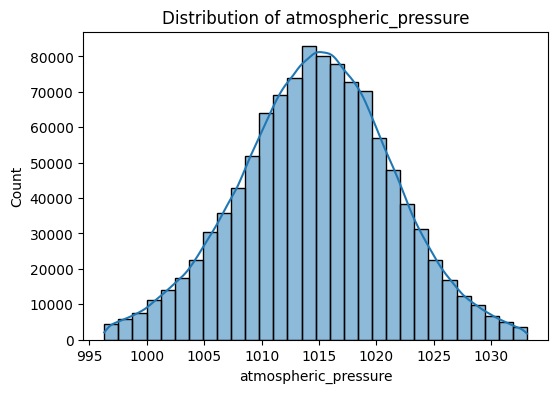

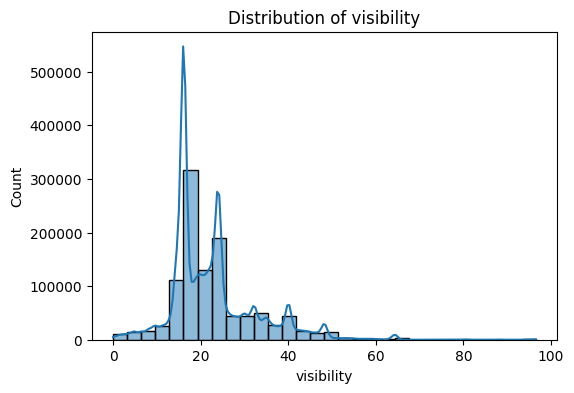

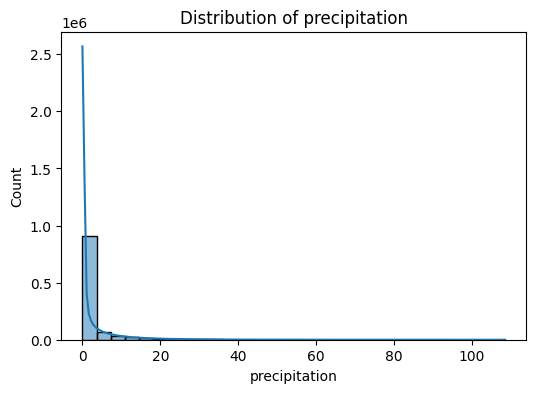

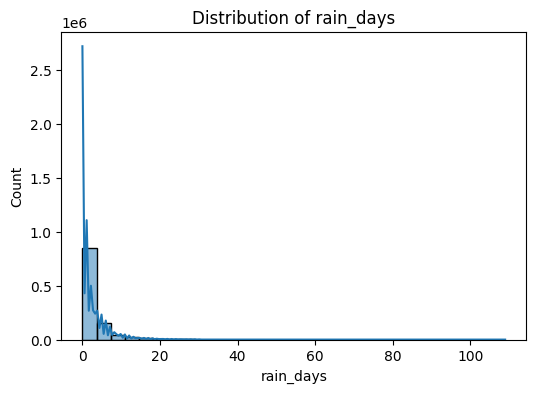

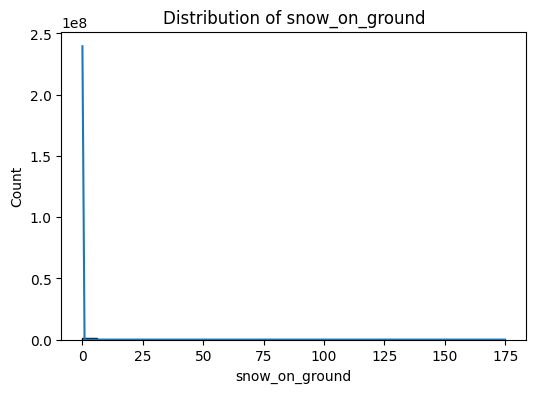

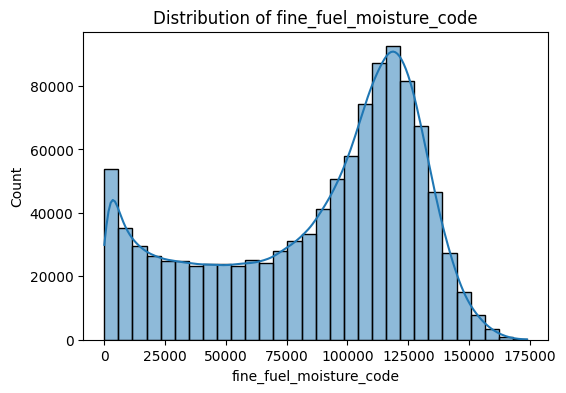

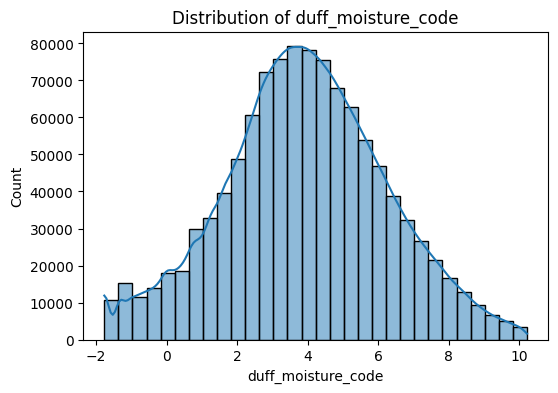

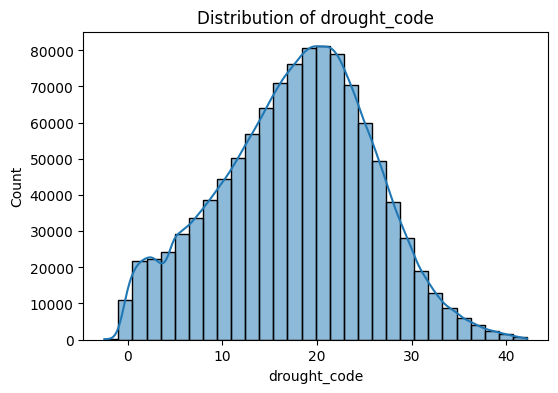

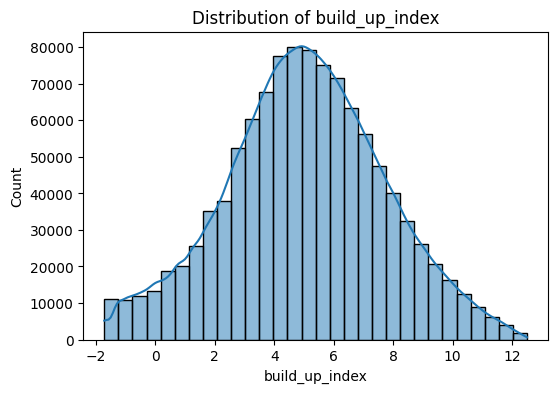

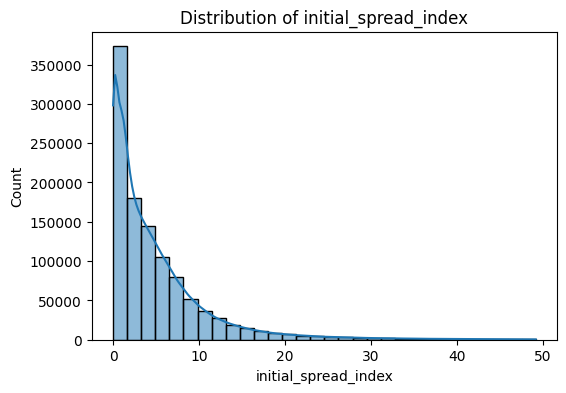

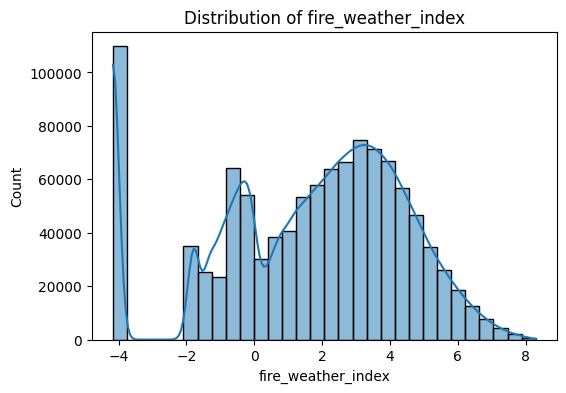

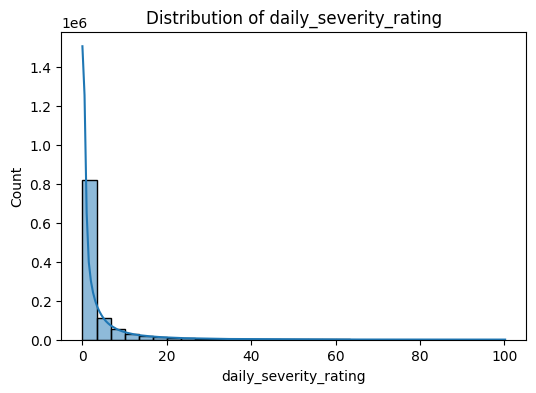

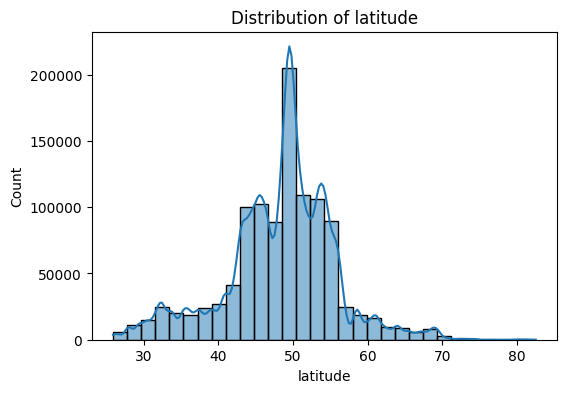

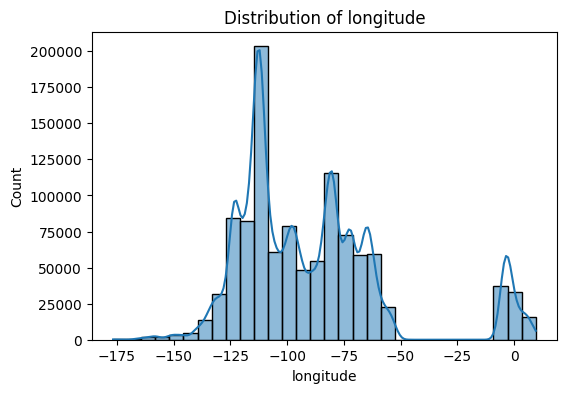

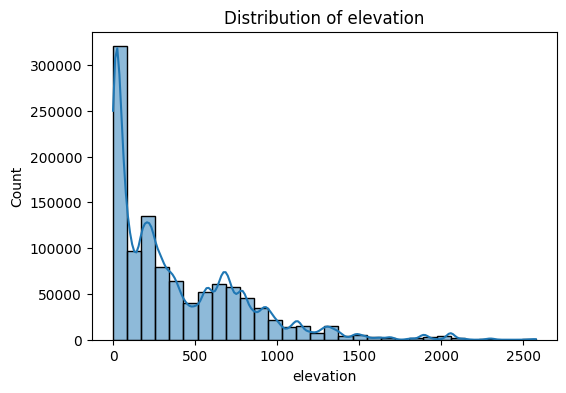

In [25]:
for col in filtered_data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(filtered_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

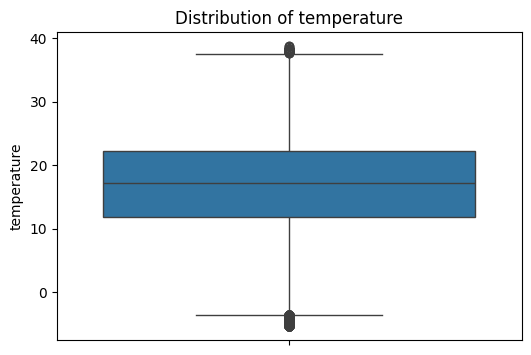

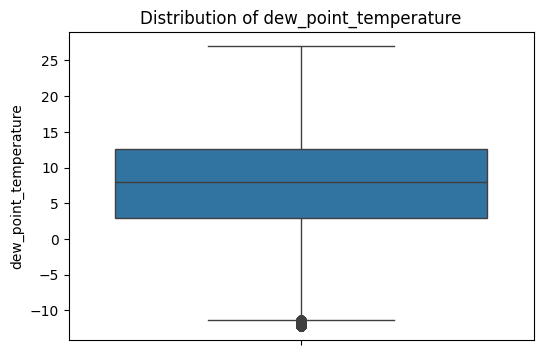

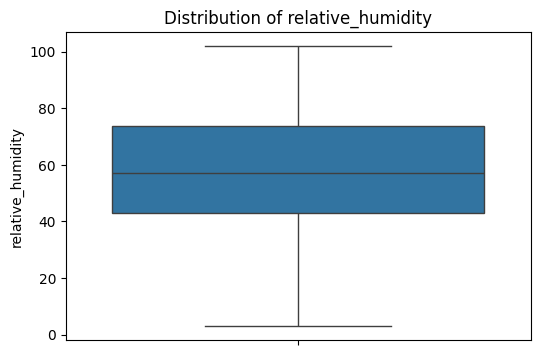

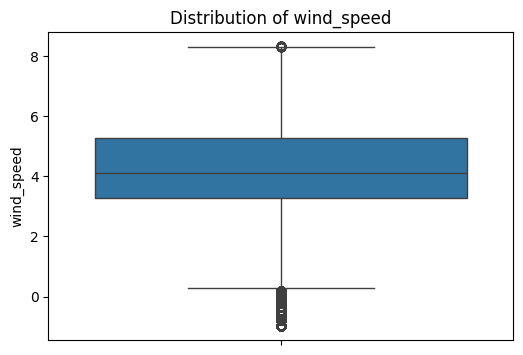

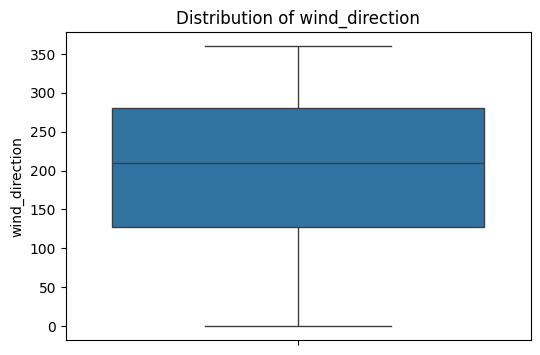

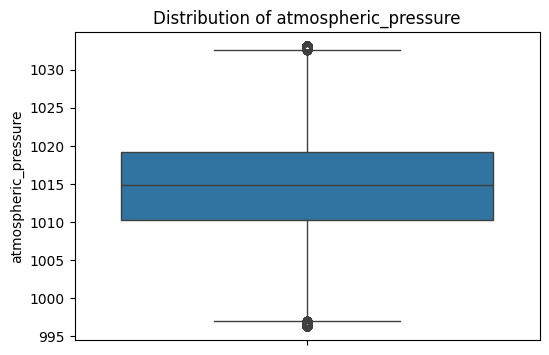

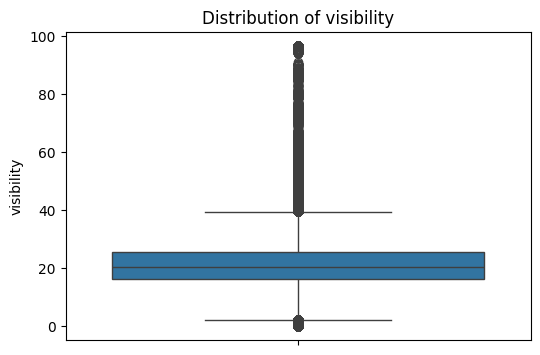

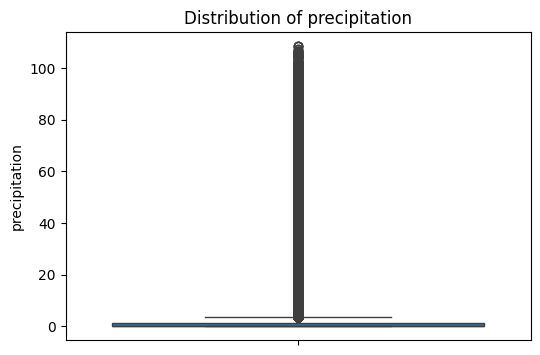

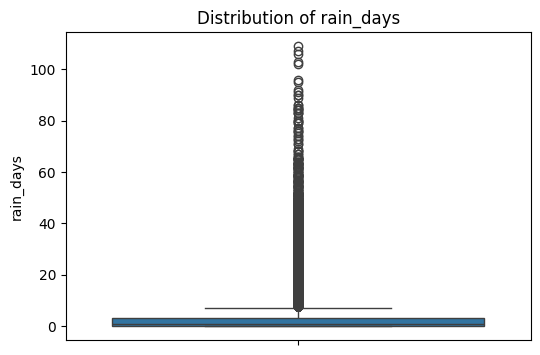

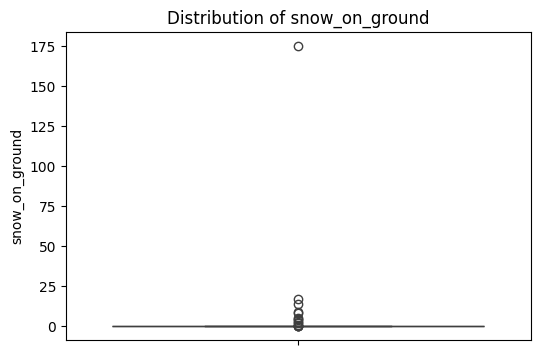

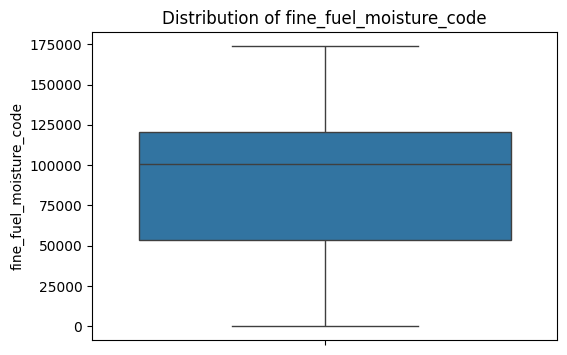

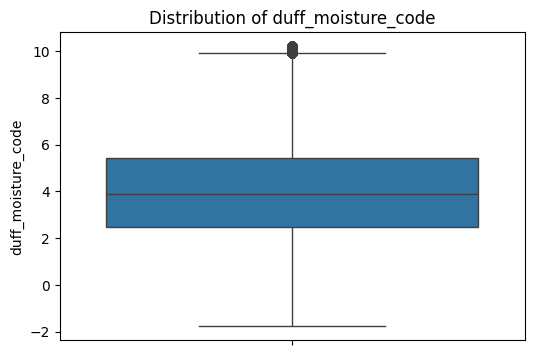

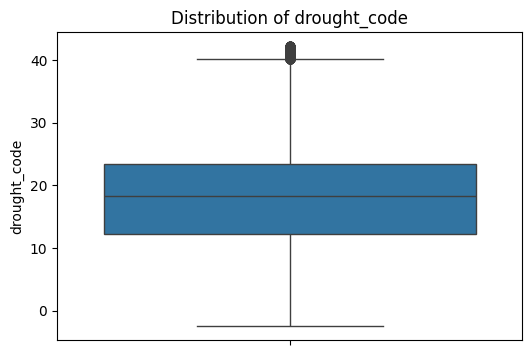

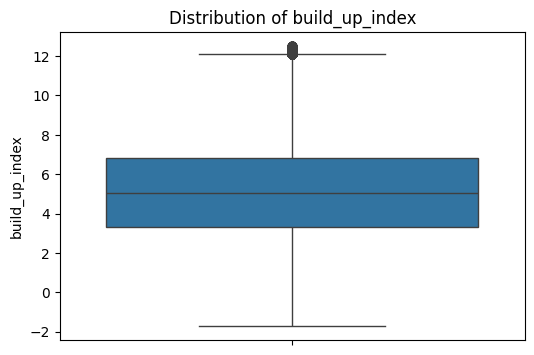

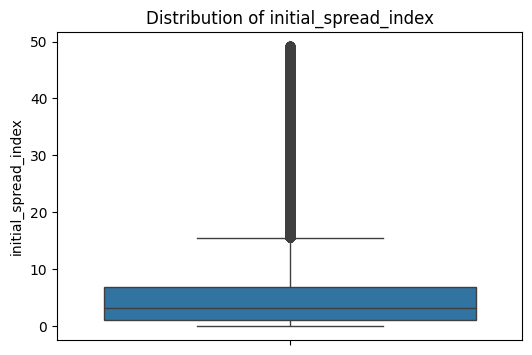

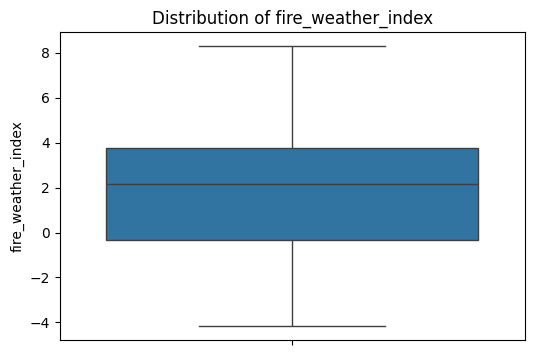

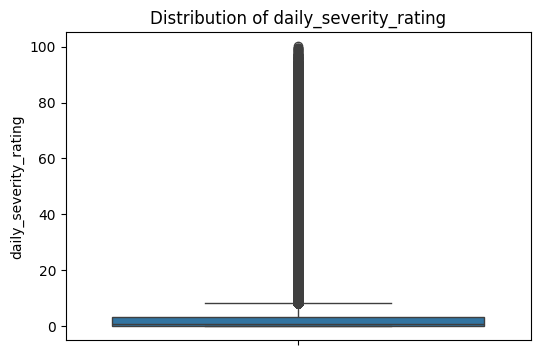

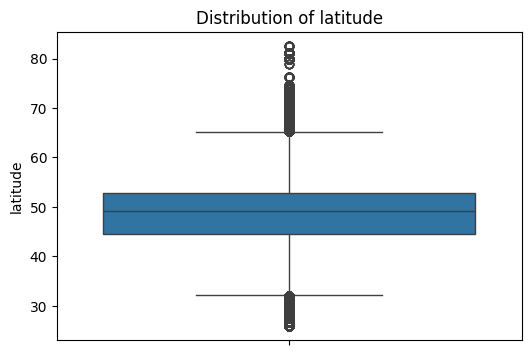

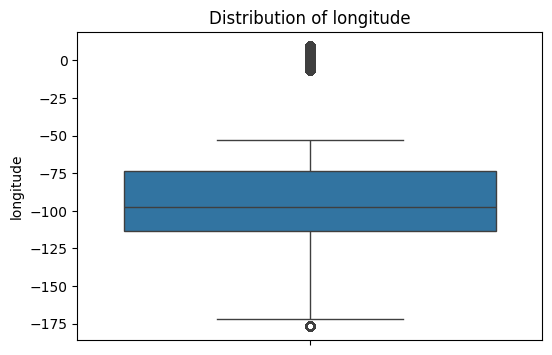

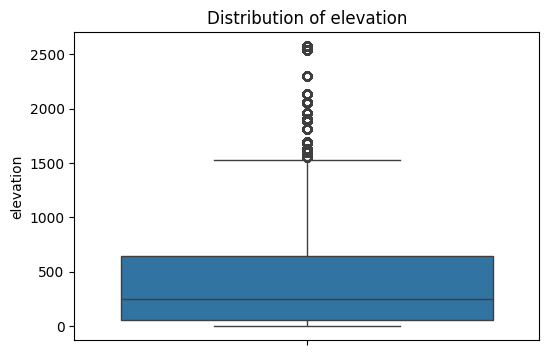

In [26]:
for col in filtered_data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = filtered_data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

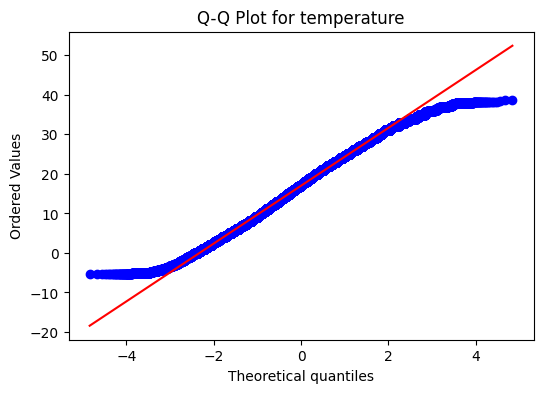

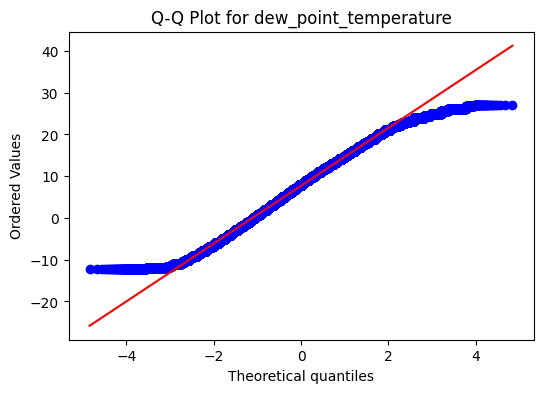

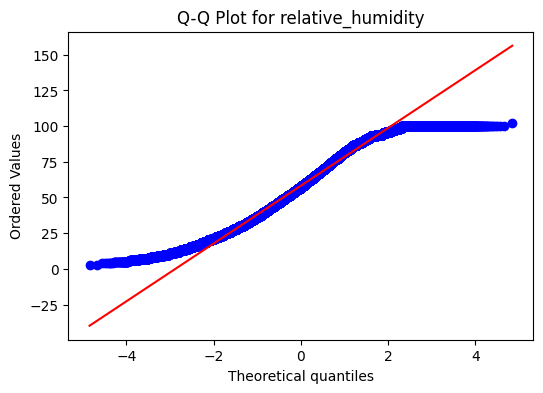

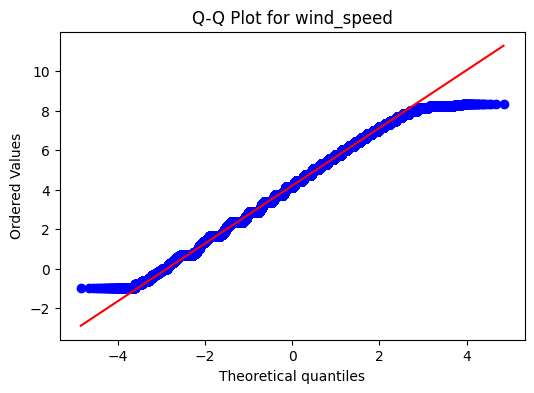

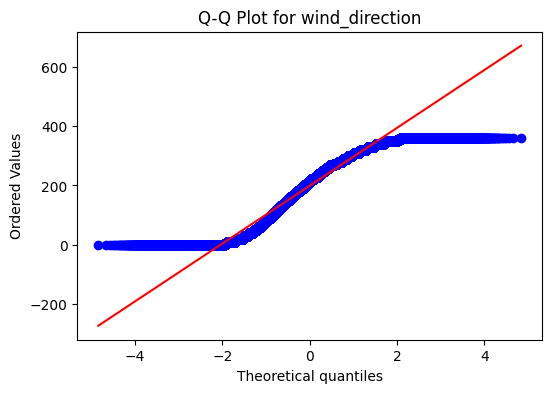

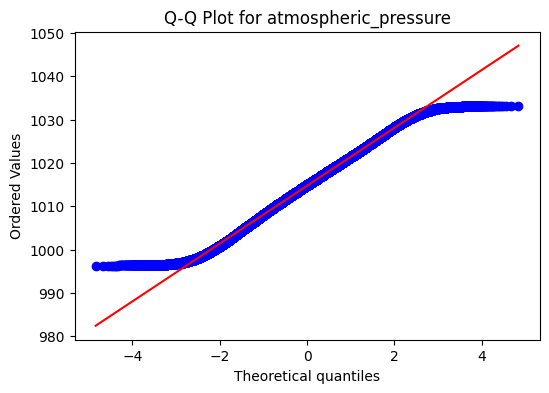

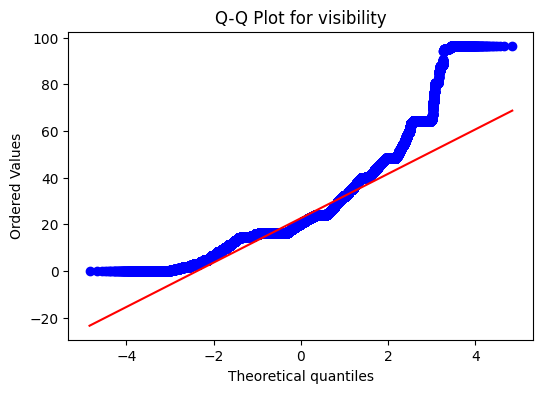

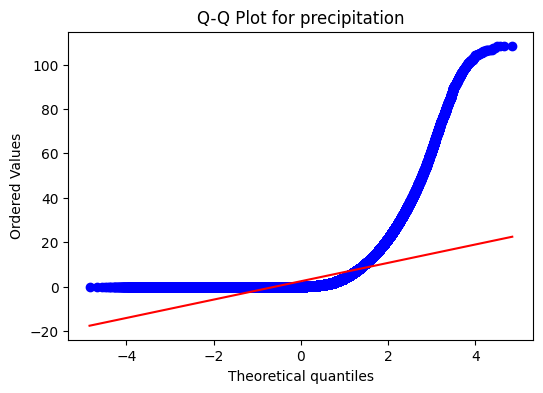

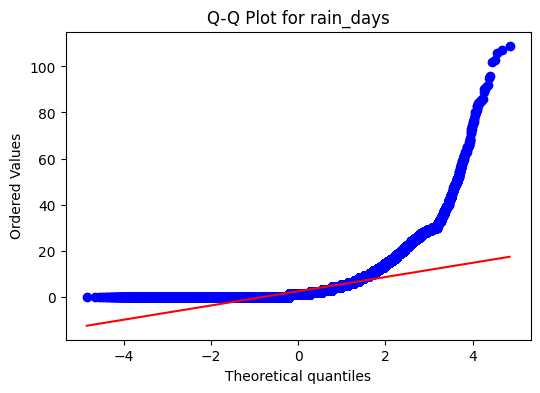

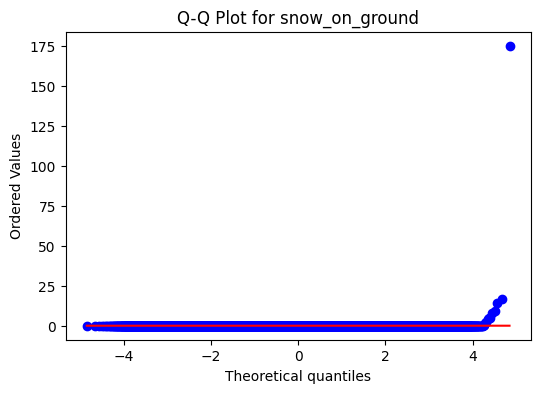

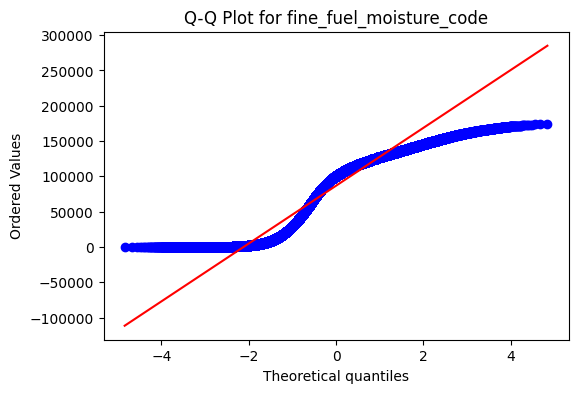

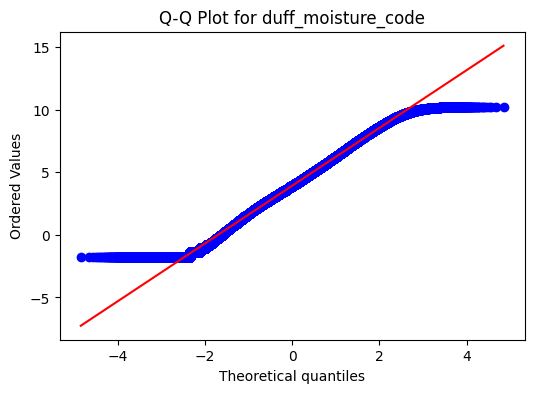

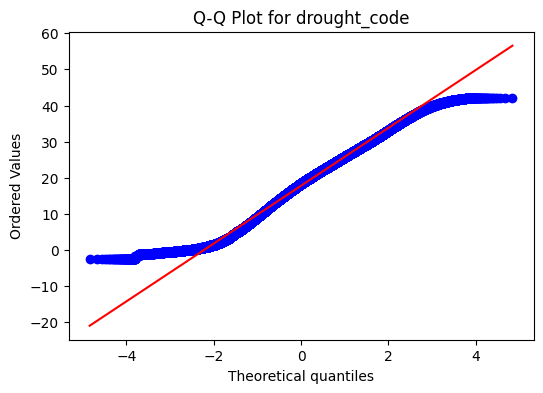

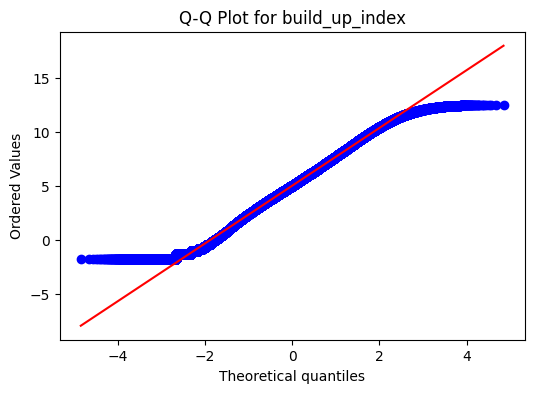

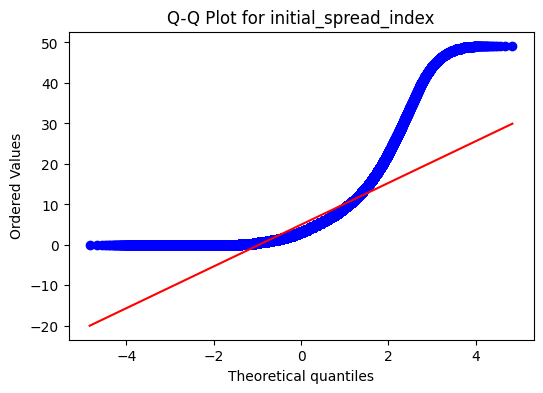

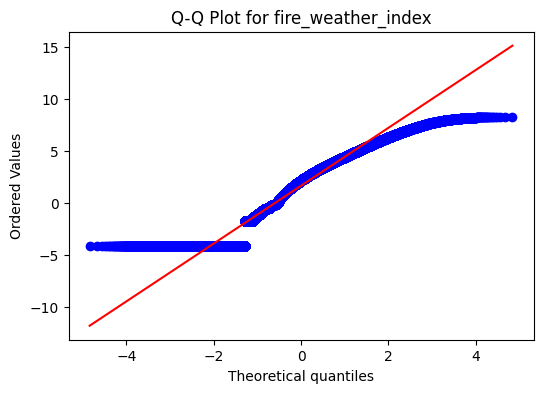

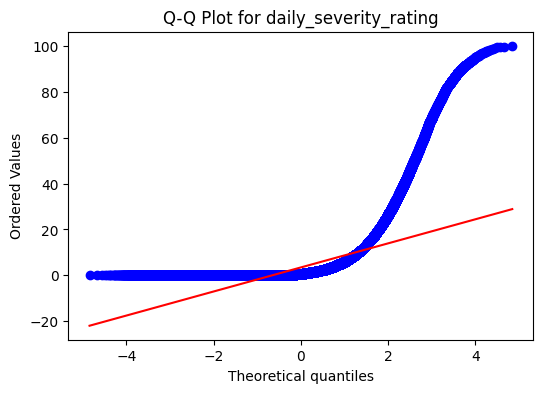

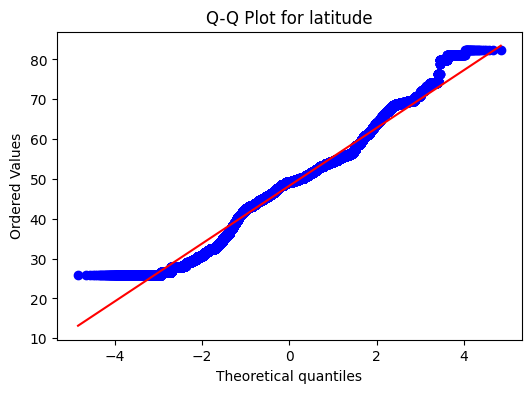

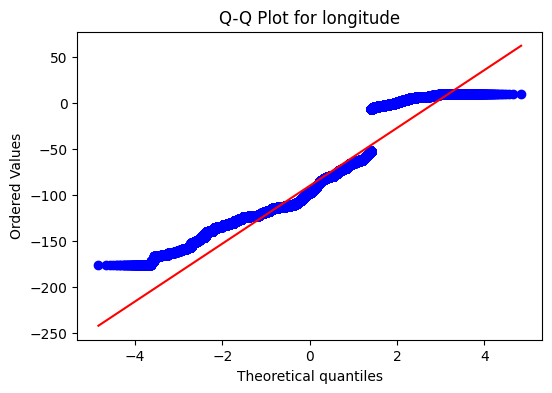

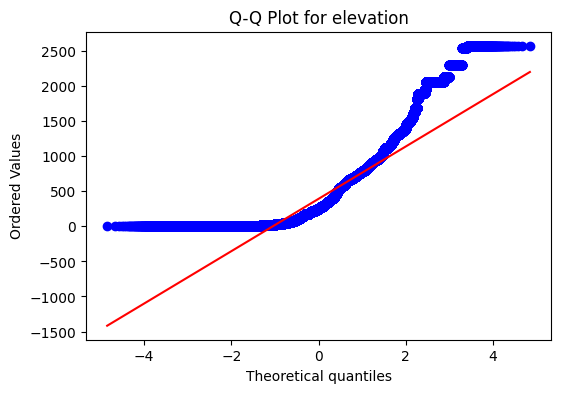

In [29]:
# Select numeric columns
numeric_cols = filtered_data.select_dtypes(include='number').columns

# Plot Q-Q plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    stats.probplot(filtered_data[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

In [30]:
filtered_data.to_csv(r'filtered_data.csv')